<a href="https://colab.research.google.com/github/lfmuneramm/Aprendizaje_No_Supervisado/blob/main/Proyecto_Final_LFMM_MJA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Proyecto final**

**Fecha de entrega:**  Lunes 26 de mayo

El proyecto se puede realizar en parejas o individual

Se debe buscar una base de datos de al menos 200 registros que contenga mensajes de la percepción de los usuarios con respecto al producto, servicio o empresa para hacer análisis de sentimientos. También se debe tener la información correspondiente de las personas que escribieron los mensajes, para poder hacer clustering y caracterización de los usuarios.

La base de datos puede estar disponible en internet, referenciándola apropiadamente. También puede ser una base de datos real de una empresa.
Los estudiantes tendrán la posibilidad de realizar encuestas para recolectar dicha información.


## Informe solicitado

Se espera un análisis que incluya lo siguiente:
1.   **```(60%)```** Creación de grupos homógeneos de los clientes en la base de datos. Reportando en cada grupo como es el sentimiento de los consumidores con respecto al producto, servicio o empresa seleccionada.
2.   **```(50%)```** Análisis y clasificación de las opiniones de los clientes con respecto a la satisfacción de los clientes en general con respecto al producto, servicio o empresa seleccionada.
  *   Nivel de satisfacción del cliente.
  *   Razón principal por la que está satisfecho o insatisfecho.
  *   Caracterización de la satisfacción de los clientes por otras variables.

## Nota
*   **No se permiten trabajos utilizando la misma base de datos**
*   **Uso de inteligencia artificial limitado**: el uso de inteligencia artificial es permitido, pero debe ser limitado, que se observe que el estudiante se apoya en ella, mas no que es un trabajo en su gran mayoría realizado por una inteligencia artificial.

---


# Rúbrica de evaluación

## Creación de grupos homógeneos (60%)

1.	Preprocesamiento de los datos (40%)
  *   Limpieza de los datos (25%)
  *   Transformación y creación de variables (15%)
2.	Exploración preliminar de los datos (10%)
  *   Gráficos de visualización
  *   Descripción de los hallazgos preliminares
3.	Desarrollo de modelos (25%)
  *   Selección de variables
  *   Preparación de variables
  *   Modelos analizados
  *   Modelo seleccionado y su justificación
  *   Presentación de los hallazgos
4.	Modelo entrenado guardado listo para asignar nuevas observaciones (10%)
5.	Informe ejecutivo de resultados (25%)

## Análisis y clasificación de la satisfacción de los clientes (50%)

1.	Procesamiento de los mensajes y creación de niveles de satisfacción (35%)
2.	Razón principal por la que está satisfecho o insatisfecho con su banco (25%)
3.	Informe ejecutivo de resultados (40%)

#Preprocesamiento

In [ ]:
# Paso 0: Importar librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configuraciones estéticas para gráficos
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

# Cargar el archivo con el separador correcto
ruta = "/content/dataset.csv"
df = pd.read_csv(ruta, sep=";")

# Mostrar tamaño y primeras filas
print(f"Filas: {df.shape[0]}, Columnas: {df.shape[1]}")
df.head()

Filas: 30798, Columnas: 36


<ipython-input-1-ae9ca85ae849>:13: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(ruta, sep=";")


Unique ID                   Name Age  Gender                     Race  \
0      25747         Mark A. Horton  21    Male   African-American/Black   
1      25748  Phillip A. Blurbridge  19    Male   African-American/Black   
2      25746        Samuel H. Knapp  17    Male  European-American/White   
3      25749             Mark Ortiz  23    Male          Hispanic/Latino   
4          1  LaTanya Janelle McCoy  24  Female   African-American/Black   

     Race with imputations Imputation probability  \
0   African-American/Black            Not imputed   
1   African-American/Black            Not imputed   
2  European-American/White            Not imputed   
3          Hispanic/Latino            Not imputed   
4   African-American/Black            Not imputed   

  URL of image (PLS NO HOTLINKS)  \
0                            NaN   
1                            NaN   
2                            NaN   
3                            NaN   
4                            NaN   

   Date of injury resulting in death (month/day/year)  \
0                                          1/01/2000    
1                                          1/01/2000    
2                                          1/01/2000    
3                                          1/01/2000    
4                                          1/02/2000    

  Location of injury (address)  ... URL Temp  \
0              Davison Freeway  ...      NaN   
1              Davison Freeway  ...      NaN   
2           27898-27804 US-101  ...      NaN   
3              600 W Cherry Ln  ...      NaN   
4         5700 block Mack Road  ...      NaN   

                                   Brief description  \
0  Two Detroit men killed when their car crashed ...   
1  Two Detroit men killed when their car crashed ...   
2  Samuel Knapp was allegedly driving a stolen ve...   
3  A motorcycle was allegedly being driven errati...   
4  LaTanya Janelle McCoy's car was struck from be...   

   Dispositions/Exclusions INTERNAL USE, NOT FOR ANALYSIS  \
0                                         Unreported        
1                                         Unreported        
2                                         Unreported        
3                                         Unreported        
4                                            Unknown        

  Intended use of force (Developing)  \
0                            Pursuit   
1                            Pursuit   
2                            Pursuit   
3                            Pursuit   
4                            Pursuit   

                            Supporting document link  \
0  https://drive.google.com/file/d/1-nK-RohgiM-tZ...   
1  https://drive.google.com/file/d/1-nK-RohgiM-tZ...   
2  https://drive.google.com/file/d/10DisrV8K5ReP1...   
3  https://drive.google.com/file/d/1qAEefRjX_aTtC...   
4  http://www.recordnet.com/article/20000110/A_NE...   

  Foreknowledge of mental illness? INTERNAL USE, NOT FOR ANALYSIS Unnamed: 32  \
0                                                 No                      NaN   
1                                                 No                      NaN   
2                                                 No                      NaN   
3                                                 No                      NaN   
4                                                 No                      NaN   

  Unnamed: 33 Unique ID formula  Unique identifier (redundant)  
0         NaN               NaN                          25747  
1         NaN               NaN                          25748  
2         NaN               NaN                          25746  
3         NaN               NaN                          25749  
4         NaN               NaN                              1  

[5 rows x 36 columns]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30798 entries, 0 to 30797
Data columns (total 36 columns):
 #   Column                                                           Non-Null Count  Dtype  
---  ------                                                           --------------  -----  
 0   Unique ID                                                        30798 non-null  int64  
 1   Name                                                             30798 non-null  object 
 2   Age                                                              29630 non-null  object 
 3   Gender                                                           30661 non-null  object 
 4   Race                                                             30798 non-null  object 
 5   Race with imputations                                            30111 non-null  object 
 6   Imputation probability                                           30092 non-null  object 
 7   URL of image (PLS NO HOTLINKS)          

In [ ]:
print(df.columns.tolist())


['Unique ID', 'Name', 'Age', 'Gender', 'Race', 'Race with imputations', 'Imputation probability', 'URL of image (PLS NO HOTLINKS)', ' Date of injury resulting in death (month/day/year)', 'Location of injury (address)', 'Location of death (city)', 'State', 'Location of death (zip code)', 'Location of death (county)', 'Full Address', 'Latitude', 'Longitude', 'Agency or agencies involved', 'Highest level of force', 'UID Temporary', 'Name Temporary', 'Armed/Unarmed', 'Alleged weapon', 'Aggressive physical movement', 'Fleeing/Not fleeing', 'Description Temp', 'URL Temp', 'Brief description', 'Dispositions/Exclusions INTERNAL USE, NOT FOR ANALYSIS', 'Intended use of force (Developing)', 'Supporting document link', 'Foreknowledge of mental illness? INTERNAL USE, NOT FOR ANALYSIS', 'Unnamed: 32', 'Unnamed: 33', 'Unique ID formula', 'Unique identifier (redundant)']


In [ ]:
df.describe()

Unique ID  Location of death (zip code)  UID Temporary  Unnamed: 32  \
count  30798.000000                  30613.000000    2304.000000          0.0   
mean   15399.500000                  58425.618626   16837.402344          NaN   
std     8890.761132                  27965.886117    6645.974628          NaN   
min        1.000000                   1013.000000   11865.000000          NaN   
25%     7700.250000                  33150.000000   12744.750000          NaN   
50%    15399.500000                  60653.000000   13326.500000          NaN   
75%    23098.750000                  85042.000000   19125.250000          NaN   
max    30798.000000                  99921.000000   29572.000000          NaN   

       Unnamed: 33  Unique ID formula  Unique identifier (redundant)  
count          1.0                1.0                   30798.000000  
mean       10895.0            27497.0                   15399.500000  
std            NaN                NaN                    8890.761132  
min        10895.0            27497.0                       1.000000  
25%        10895.0            27497.0                    7700.250000  
50%        10895.0            27497.0                   15399.500000  
75%        10895.0            27497.0                   23098.750000  
max        10895.0            27497.0                   30798.000000

In [ ]:
df.isnull().sum()

Unique ID                                                              0
Name                                                                   0
Age                                                                 1168
Gender                                                               137
Race                                                                   0
Race with imputations                                                687
Imputation probability                                               706
URL of image (PLS NO HOTLINKS)                                     16479
 Date of injury resulting in death (month/day/year)                    0
Location of injury (address)                                         553
Location of death (city)                                              38
State                                                                  0
Location of death (zip code)                                         185
Location of death (county)                                            15
Full Address                                                           0
Latitude                                                               0
Longitude                                                              0
Agency or agencies involved                                           77
Highest level of force                                                 3
UID Temporary                                                      28494
Name Temporary                                                     28494
Armed/Unarmed                                                      16940
Alleged weapon                                                     21892
Aggressive physical movement                                       20606
Fleeing/Not fleeing                                                16936
Description Temp                                                   29956
URL Temp                                                           30795
Brief description                                                      1
Dispositions/Exclusions INTERNAL USE, NOT FOR ANALYSIS                 1
Intended use of force (Developing)                                     2
Supporting document link                                               1
Foreknowledge of mental illness? INTERNAL USE, NOT FOR ANALYSIS       61
Unnamed: 32                                                        30798
Unnamed: 33                                                        30797
Unique ID formula                                                  30797
Unique identifier (redundant)                                          0
dtype: int64

In [ ]:
# Renombrar la columna para facilitar el manejo
df.rename(columns={' Date of injury resulting in death (month/day/year)': 'Date_of_death'}, inplace=True)

# Convertir la nueva columna 'date_of_death' a datetime
df['Date_of_death'] = pd.to_datetime(df['Date_of_death'], errors='coerce')

# Mostrar las primeras filas para verificar
print(df['Date_of_death'].head())


0   2000-01-01
1   2000-01-01
2   2000-01-01
3   2000-01-01
4   2000-01-02
Name: Date_of_death, dtype: datetime64[ns]


In [ ]:
# Copiar el DataFrame original
df_limpio = df.copy()

# Renombrar la columna 'Location of death (city/state)' a 'City'
df_limpio.rename(columns={'Location of death (city)': 'City'}, inplace=True)
# Eliminar columnas irrelevantes
columnas_a_eliminar = [
    'Unique ID',
    'Name',
    'URL of image (PLS NO HOTLINKS)',
    'Location of injury (address)',
    'Location of death (zip code)',
    'Location of death (county)',
    'Full Address',
    'Agency or agencies involved',
    'UID Temporary',
    'Name Temporary',
    'Description Temp',
    'URL Temp',
    'Dispositions/Exclusions INTERNAL USE, NOT FOR ANALYSIS',
    'Intended use of force (Developing)'
    'Supporting document link',
    'Unnamed: 32',
    'Unnamed: 33',
    'Unique ID formula',
    'Unique identifier (redundant)',
    'URL of news article',
    'Unique ID'
]

# Eliminar columnas si están en el DataFrame
df_limpio = df_limpio.drop(columns=[col for col in columnas_a_eliminar if col in df_limpio.columns])

# Mostrar las columnas restantes
print("Columnas después de la limpieza:")
print(df_limpio.columns.tolist())

# Verificar valores faltantes
print("\nValores faltantes por columna:")
print(df_limpio.isnull().sum())


Columnas después de la limpieza:
['Age', 'Gender', 'Race', 'Race with imputations', 'Imputation probability', 'Date_of_death', 'City', 'State', 'Latitude', 'Longitude', 'Highest level of force', 'Armed/Unarmed', 'Alleged weapon', 'Aggressive physical movement', 'Fleeing/Not fleeing', 'Brief description', 'Intended use of force (Developing)', 'Supporting document link', 'Foreknowledge of mental illness? INTERNAL USE, NOT FOR ANALYSIS']

Valores faltantes por columna:
Age                                                                 1168
Gender                                                               137
Race                                                                   0
Race with imputations                                                687
Imputation probability                                               706
Date_of_death                                                          0
City                                                                  38
State             

In [ ]:

import pandas as pd

# Cargar el archivo con el separador correcto
ruta = "/content/dataset (1).csv"
# Intenta especificar el encoding si es necesario
try:
    df = pd.read_csv(ruta, sep=";")
except UnicodeDecodeError:
    print("Error de codificación, intentando con 'latin-1'")
    df = pd.read_csv(ruta, sep=";", encoding='latin-1')
except Exception as e:
    print(f"Error al cargar el archivo: {e}")


# Renombrar la columna de fecha
df.rename(columns={' Date of injury resulting in death (month/day/year)': 'Date_of_death'}, inplace=True)

# Intentar convertir la columna de fecha especificando un formato común
# Ajusta el formato ('%m/%d/%Y') según cómo aparezcan las fechas en tu archivo Excel
try:
    df['Date_of_death'] = pd.to_datetime(df['Date_of_death'], format='%m/%d/%Y', errors='coerce')
except ValueError:
    print("No se pudo convertir con el formato '%m/%d/%Y', intentando sin formato específico.")
    df['Date_of_death'] = pd.to_datetime(df['Date_of_death'], errors='coerce')


# Verificar cuántos valores NaT hay después de la conversión
nan_dates = df['Date_of_death'].isnull().sum()
print(f"\nNúmero de filas con fechas no convertibles (NaT) después de intentar con formato: {nan_dates}")

# Imprimir el rango de fechas después de la conversión
print("\nRango de fechas después de la conversión:")
print(f"Fecha mínima: {df['Date_of_death'].min()}")
print(f"Fecha máxima: {df['Date_of_death'].max()}")

# Filtrar desde el año 2013 en adelante
df_filtrado = df[df['Date_of_death'].dt.year >= 2013]

print(f"\nNúmero de filas después del filtrado por año 2013+: {df_filtrado.shape[0]}")

# Mostrar los primeros registros para verificar
print("\nPrimeros registros después del filtrado:")
display(df_filtrado.head())

Error al cargar el archivo: [Errno 2] No such file or directory: '/content/dataset (1).csv'

Número de filas con fechas no convertibles (NaT) después de intentar con formato: 0

Rango de fechas después de la conversión:
Fecha mínima: 2000-01-01 00:00:00
Fecha máxima: 2021-08-19 00:00:00

Número de filas después del filtrado por año 2013+: 15557

Primeros registros después del filtrado:


Unique ID                 Name Age  Gender                     Race  \
15241      12169       Sylvia Tun Cun  29  Female          Hispanic/Latino   
15242      12170  Francisco Gutierrez  26    Male          Hispanic/Latino   
15243      12173           Tyree Bell  31    Male   African-American/Black   
15244      12172    Andrew L. Closson  21    Male  European-American/White   
15245      12171  Andrew Derek Layton  26    Male  European-American/White   

         Race with imputations Imputation probability  \
15241          Hispanic/Latino            Not imputed   
15242          Hispanic/Latino            Not imputed   
15243   African-American/Black            Not imputed   
15244  European-American/White            Not imputed   
15245  European-American/White            Not imputed   

                          URL of image (PLS NO HOTLINKS) Date_of_death  \
15241                                                NaN    2013-01-01   
15242                                                NaN    2013-01-01   
15243  http://content.omaha.com/media/maps/ps/2013/ja...    2013-01-01   
15244  http://www.superiortelegram.com/sites/default/...    2013-01-01   
15245  http://bloximages.chicago2.vip.townnews.com/ma...    2013-01-01   

      Location of injury (address)  ... URL Temp  \
15241     S Van Ness Ave & 21st St  ...      NaN   
15242     S Van Ness Ave & 21st St  ...      NaN   
15243             3727 N. 42nd St.  ...      NaN   
15244              U.S. Highway 53  ...      NaN   
15245       410 S Riverfront Drive  ...      NaN   

                                       Brief description  \
15241  Early in the morning on New Year's Day police ...   
15242  Early in the morning on New Year's Day police ...   
15243  Omaha Police Department responded to a 911 dom...   
15244  Deputies responded to a 911 call of shots fire...   
15245  Former combat medic Andrew Derek Layton was fo...   

       Dispositions/Exclusions INTERNAL USE, NOT FOR ANALYSIS  \
15241                                         Unreported        
15242                                         Unreported        
15243                      Grand jury/No bill or Cleared        
15244                                          Justified        
15245                                         Unreported        

      Intended use of force (Developing)  \
15241                            Pursuit   
15242                            Pursuit   
15243                       Deadly force   
15244                       Deadly force   
15245             Less-than-lethal force   

                                Supporting document link  \
15241  http://missionlocal.org/2013/01/second-victim-...   
15242  http://missionlocal.org/2013/01/second-victim-...   
15243  http://www.ketv.com/news/Police-chief-details-...   
15244  http://www.superiortelegram.com/content/deputy...   
15245  http://www.tmcnet.com/usubmit/2013/02/21/69388...   

      Foreknowledge of mental illness? INTERNAL USE, NOT FOR ANALYSIS  \
15241                                                 No                
15242                                                 No                
15243                                                Yes                
15244                                Drug or alcohol use                
15245                                                 No                

      Unnamed: 32 Unnamed: 33 Unique ID formula  Unique identifier (redundant)  
15241         NaN         NaN               NaN                          12169  
15242         NaN         NaN               NaN                          12170  
15243         NaN         NaN               NaN                          12173  
15244         NaN         NaN               NaN                          12172  
15245         NaN         NaN               NaN                          12171  

[5 rows x 36 columns]

In [ ]:
# Asegurarse de que la columna de fecha esté en formato datetime
if 'Date_of_death' in df_limpio.columns:
    df_limpio['Date_of_death'] = pd.to_datetime(df_limpio['Date_of_death'], errors='coerce')

    # Filtrar desde el año 2013 en adelante
    df_filtrado = df_limpio[df_limpio['Date_of_death'].dt.year >= 2013]

    # Mostrar los primeros registros para verificar
    print("Primeros registros después del filtrado:")
    print(df_filtrado.head())
else:
    print("La columna 'Date' no está en el DataFrame.")

Primeros registros después del filtrado:
      Age  Gender                     Race    Race with imputations  \
15241  29  Female          Hispanic/Latino          Hispanic/Latino   
15242  26    Male          Hispanic/Latino          Hispanic/Latino   
15243  31    Male   African-American/Black   African-American/Black   
15244  21    Male  European-American/White  European-American/White   
15245  26    Male  European-American/White  European-American/White   

      Imputation probability Date_of_death           City State    Latitude  \
15241            Not imputed    2013-01-01  San Francisco    CA  37,7571758   
15242            Not imputed    2013-01-01  San Francisco    CA  37,7571758   
15243            Not imputed    2013-01-01          Omaha    NE  41,2930875   
15244            Not imputed    2013-01-01         Gordon    WI  46,2508616   
15245            Not imputed    2013-01-01        Mankato    MN  44,1659029   

          Longitude Highest level of force Armed/Unarmed 

In [ ]:
# Asegurarse de que la columna de fecha esté en formato datetime y manejar errores
if 'Date_of_death' in df_limpio.columns:
    # Convertir a datetime, los valores que no se pueden convertir serán NaT
    df_limpio['Date_of_death'] = pd.to_datetime(df_limpio['Date_of_death'], errors='coerce')

    # Contar cuántos valores NaT hay después de la conversión
    nan_dates = df_limpio['Date_of_death'].isnull().sum()
    print(f"\nNúmero de filas con fechas no convertibles (NaT): {nan_dates}")

    # Filtrar desde el año 2013 en adelante
    df_filtrado = df_limpio[df_limpio['Date_of_death'].dt.year >= 2013]

    print(f"\nNúmero de filas después del filtrado por año 2013+: {df_filtrado.shape[0]}")

    # Mostrar los primeros registros para verificar
    print("\nPrimeros registros después del filtrado:")
    display(df_filtrado.head())
else:
    print("La columna 'Date_of_death' no está en el DataFrame.")


Número de filas con fechas no convertibles (NaT): 0

Número de filas después del filtrado por año 2013+: 15557

Primeros registros después del filtrado:


Age  Gender                     Race    Race with imputations  \
15241  29  Female          Hispanic/Latino          Hispanic/Latino   
15242  26    Male          Hispanic/Latino          Hispanic/Latino   
15243  31    Male   African-American/Black   African-American/Black   
15244  21    Male  European-American/White  European-American/White   
15245  26    Male  European-American/White  European-American/White   

      Imputation probability Date_of_death           City State    Latitude  \
15241            Not imputed    2013-01-01  San Francisco    CA  37,7571758   
15242            Not imputed    2013-01-01  San Francisco    CA  37,7571758   
15243            Not imputed    2013-01-01          Omaha    NE  41,2930875   
15244            Not imputed    2013-01-01         Gordon    WI  46,2508616   
15245            Not imputed    2013-01-01        Mankato    MN  44,1659029   

          Longitude Highest level of force Armed/Unarmed   Alleged weapon  \
15241  -122,4167485                Vehicle       Unarmed              NaN   
15242  -122,4167485                Vehicle       Unarmed              NaN   
15243   -95,9754491                Gunshot         Armed  Firearm/Shotgun   
15244   -91,8000693                Gunshot         Armed    Firearm/Rifle   
15245   -94,0065737                Tasered       Unarmed              NaN   

      Aggressive physical movement Fleeing/Not fleeing  \
15241                          NaN         Not fleeing   
15242                          NaN         Not fleeing   
15243            Brandished weapon         Not fleeing   
15244            Brandished weapon         Not fleeing   
15245                    Struggled         Not fleeing   

                                       Brief description  \
15241  Early in the morning on New Year's Day police ...   
15242  Early in the morning on New Year's Day police ...   
15243  Omaha Police Department responded to a 911 dom...   
15244  Deputies responded to a 911 call of shots fire...   
15245  Former combat medic Andrew Derek Layton was fo...   

      Intended use of force (Developing)  \
15241                            Pursuit   
15242                            Pursuit   
15243                       Deadly force   
15244                       Deadly force   
15245             Less-than-lethal force   

                                Supporting document link  \
15241  http://missionlocal.org/2013/01/second-victim-...   
15242  http://missionlocal.org/2013/01/second-victim-...   
15243  http://www.ketv.com/news/Police-chief-details-...   
15244  http://www.superiortelegram.com/content/deputy...   
15245  http://www.tmcnet.com/usubmit/2013/02/21/69388...   

      Foreknowledge of mental illness? INTERNAL USE, NOT FOR ANALYSIS  
15241                                                 No               
15242                                                 No               
15243                                                Yes               
15244                                Drug or alcohol use               
15245                                                 No

In [ ]:
#Sumamos los nulos de df_limpio_2013
#Mostrar la cantidad de valores nulos por columna en df_limpio_2013
print("Valores nulos por columna en df_limpio_2013:")
print(df_filtrado.isnull().sum())


Valores nulos por columna en df_limpio_2013:
Age                                                                 746
Gender                                                              105
Race                                                                  0
Race with imputations                                               649
Imputation probability                                              663
Date_of_death                                                         0
City                                                                  5
State                                                                 0
Latitude                                                              0
Longitude                                                             0
Highest level of force                                                3
Armed/Unarmed                                                      1700
Alleged weapon                                                     6652
Aggressive physical

In [ ]:
df_limpio_2013 = df_filtrado.dropna()


In [ ]:
#Sumamos los nulos de df_limpio_2013
#Mostrar la cantidad de valores nulos por columna en df_limpio_2013
print("Valores nulos por columna en df_limpio_2013:")
print(df_limpio_2013 .isnull().sum())

Valores nulos por columna en df_limpio_2013:
Age                                                                0
Gender                                                             0
Race                                                               0
Race with imputations                                              0
Imputation probability                                             0
Date_of_death                                                      0
City                                                               0
State                                                              0
Latitude                                                           0
Longitude                                                          0
Highest level of force                                             0
Armed/Unarmed                                                      0
Alleged weapon                                                     0
Aggressive physical movement                              

###Importación de librerías y configuración

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

# Configuración estética
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)


###Exploración inicial de los datos

In [ ]:
ruta = "/content/dataset (1).csv"

try:
    df = pd.read_csv(ruta, sep=";")
except UnicodeDecodeError:
    print("Error de codificación, intentando con 'latin-1'")
    df = pd.read_csv(ruta, sep=";", encoding='latin-1')
except Exception as e:
    print(f"Error al cargar el archivo: {e}")


Error al cargar el archivo: [Errno 2] No such file or directory: '/content/dataset (1).csv'


###Conversión de columna de fecha

In [ ]:
df.rename(columns={' Date of injury resulting in death (month/day/year)': 'Date_of_death'}, inplace=True)

try:
    df['Date_of_death'] = pd.to_datetime(df['Date_of_death'], format='%m/%d/%Y', errors='coerce')
except ValueError:
    print("Formato específico fallido, intentando sin formato.")
    df['Date_of_death'] = pd.to_datetime(df['Date_of_death'], errors='coerce')

print(df['Date_of_death'].head())
print(f"\nFechas no convertibles: {df['Date_of_death'].isnull().sum()}")
print("\nRango de fechas:")
print(f"Min: {df['Date_of_death'].min()}, Max: {df['Date_of_death'].max()}")


0   2000-01-01
1   2000-01-01
2   2000-01-01
3   2000-01-01
4   2000-01-02
Name: Date_of_death, dtype: datetime64[ns]

Fechas no convertibles: 0

Rango de fechas:
Min: 2000-01-01 00:00:00, Max: 2021-08-19 00:00:00


###Limpieza de columnas irrelevantes

In [ ]:
df_limpio = df.copy()

if 'Location of death (city)' in df_limpio.columns:
    df_limpio.rename(columns={'Location of death (city)': 'City'}, inplace=True)

columnas_a_eliminar = list(set([
    'Unique ID', 'Name', 'URL of image (PLS NO HOTLINKS)', 'Location of injury (address)',
    'Location of death (zip code)', 'Location of death (county)', 'Full Address',
    'Agency or agencies involved', 'UID Temporary', 'Name Temporary', 'Description Temp',
    'URL Temp', 'Dispositions/Exclusions INTERNAL USE, NOT FOR ANALYSIS',
    'Intended use of force (Developing)', 'Supporting document link', 'Unnamed: 32',
    'Unnamed: 33', 'Unique ID formula', 'Unique identifier (redundant)'
]))

cols_to_drop_existing = [col for col in columnas_a_eliminar if col in df_limpio.columns]

if cols_to_drop_existing:
    df_limpio.drop(columns=cols_to_drop_existing, inplace=True)
    print(f"Columnas eliminadas: {cols_to_drop_existing}")

print("Columnas restantes:")
print(df_limpio.columns.tolist())
print("\nValores faltantes:")
print(df_limpio.isnull().sum())


Columnas eliminadas: ['Description Temp', 'UID Temporary', 'Unique ID formula', 'Name Temporary', 'URL of image (PLS NO HOTLINKS)', 'Name', 'Unique ID', 'Supporting document link', 'Location of injury (address)', 'Agency or agencies involved', 'Intended use of force (Developing)', 'Location of death (county)', 'URL Temp', 'Unique identifier (redundant)', 'Unnamed: 33', 'Full Address', 'Location of death (zip code)', 'Dispositions/Exclusions INTERNAL USE, NOT FOR ANALYSIS', 'Unnamed: 32']
Columnas restantes:
['Age', 'Gender', 'Race', 'Race with imputations', 'Imputation probability', 'Date_of_death', 'City', 'State', 'Latitude', 'Longitude', 'Highest level of force', 'Armed/Unarmed', 'Alleged weapon', 'Aggressive physical movement', 'Fleeing/Not fleeing', 'Brief description', 'Foreknowledge of mental illness? INTERNAL USE, NOT FOR ANALYSIS']

Valores faltantes:
Age                                                                 1168
Gender                                                

###Filtrado por fecha (desde 2013)

In [ ]:
if 'Date_of_death' in df_limpio.columns:
    df_limpio['Date_of_death'] = pd.to_datetime(df_limpio['Date_of_death'], errors='coerce')
    nan_dates = df_limpio['Date_of_death'].isnull().sum()
    print(f"Fechas no convertibles (NaT): {nan_dates}")

    df_filtrado = df_limpio[df_limpio['Date_of_death'].dt.year >= 2013]
    print(f"Filas después del filtro por año >= 2013: {df_filtrado.shape[0]}")
    display(df_filtrado.head())
else:
    print("Columna 'Date_of_death' no encontrada.")


Fechas no convertibles (NaT): 0
Filas después del filtro por año >= 2013: 15557


Age  Gender                     Race    Race with imputations  \
15241  29  Female          Hispanic/Latino          Hispanic/Latino   
15242  26    Male          Hispanic/Latino          Hispanic/Latino   
15243  31    Male   African-American/Black   African-American/Black   
15244  21    Male  European-American/White  European-American/White   
15245  26    Male  European-American/White  European-American/White   

      Imputation probability Date_of_death           City State    Latitude  \
15241            Not imputed    2013-01-01  San Francisco    CA  37,7571758   
15242            Not imputed    2013-01-01  San Francisco    CA  37,7571758   
15243            Not imputed    2013-01-01          Omaha    NE  41,2930875   
15244            Not imputed    2013-01-01         Gordon    WI  46,2508616   
15245            Not imputed    2013-01-01        Mankato    MN  44,1659029   

          Longitude Highest level of force Armed/Unarmed   Alleged weapon  \
15241  -122,4167485                Vehicle       Unarmed              NaN   
15242  -122,4167485                Vehicle       Unarmed              NaN   
15243   -95,9754491                Gunshot         Armed  Firearm/Shotgun   
15244   -91,8000693                Gunshot         Armed    Firearm/Rifle   
15245   -94,0065737                Tasered       Unarmed              NaN   

      Aggressive physical movement Fleeing/Not fleeing  \
15241                          NaN         Not fleeing   
15242                          NaN         Not fleeing   
15243            Brandished weapon         Not fleeing   
15244            Brandished weapon         Not fleeing   
15245                    Struggled         Not fleeing   

                                       Brief description  \
15241  Early in the morning on New Year's Day police ...   
15242  Early in the morning on New Year's Day police ...   
15243  Omaha Police Department responded to a 911 dom...   
15244  Deputies responded to a 911 call of shots fire...   
15245  Former combat medic Andrew Derek Layton was fo...   

      Foreknowledge of mental illness? INTERNAL USE, NOT FOR ANALYSIS  
15241                                                 No               
15242                                                 No               
15243                                                Yes               
15244                                Drug or alcohol use               
15245                                                 No

###Limpieza final de nulos y columna 'Age'

In [ ]:
print("Nulos en df_filtrado:")
print(df_filtrado.isnull().sum())

df_limpio_2013 = df_filtrado.dropna()

df_limpio_2013['Age'] = df_limpio_2013['Age'].astype(str).str.replace(',', '', regex=False)
df_limpio_2013['Age'] = pd.to_numeric(df_limpio_2013['Age'], errors='coerce')
df_limpio_2013.dropna(subset=['Age'], inplace=True)

print(f"Filas finales después de limpiar 'Age': {df_limpio_2013.shape[0]}")
print("Nulos después de limpieza:")
print(df_limpio_2013.isnull().sum())


Nulos en df_filtrado:
Age                                                                 746
Gender                                                              105
Race                                                                  0
Race with imputations                                               649
Imputation probability                                              663
Date_of_death                                                         0
City                                                                  5
State                                                                 0
Latitude                                                              0
Longitude                                                             0
Highest level of force                                                3
Armed/Unarmed                                                      1700
Alleged weapon                                                     6652
Aggressive physical movement              

<ipython-input-19-b70da036ba2b>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_limpio_2013['Age'] = df_limpio_2013['Age'].astype(str).str.replace(',', '', regex=False)
<ipython-input-19-b70da036ba2b>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_limpio_2013['Age'] = pd.to_numeric(df_limpio_2013['Age'], errors='coerce')
<ipython-input-19-b70da036ba2b>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.

###Clustering con K-Means

Columna 'Age' validada como numérica.


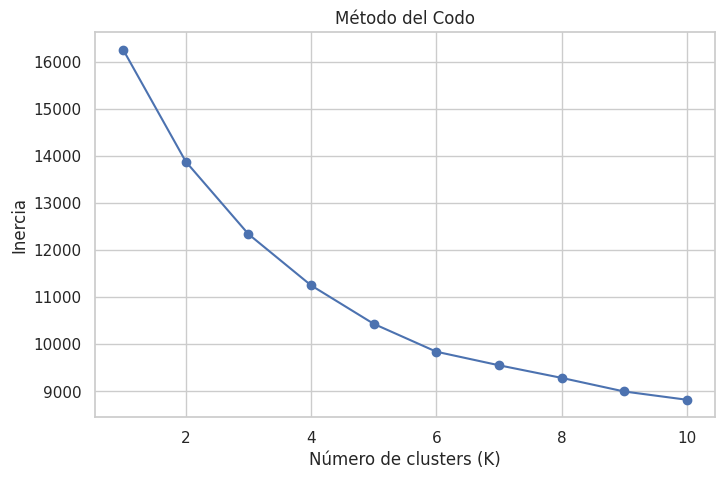

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

variables = ['Age', 'Gender', 'Race', 'State', 'Armed/Unarmed', 'Fleeing/Not fleeing']
df_cluster = df_limpio_2013[variables].copy()

if not pd.api.types.is_numeric_dtype(df_cluster['Age']):
    print("Error: 'Age' no es numérica.")
else:
    print("Columna 'Age' validada como numérica.")

numerical_features = ['Age']
categorical_features = ['Gender', 'Race', 'State', 'Armed/Unarmed', 'Fleeing/Not fleeing']

preprocesador = ColumnTransformer([
    ('num', MinMaxScaler(), numerical_features),
    ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), categorical_features)
])

X = preprocesador.fit_transform(df_cluster)

# Calcular inercia para varios valores de K
inercia = []
K_range = range(1, 11)

for k in K_range:
    modelo = KMeans(n_clusters=k, random_state=42, n_init=10)
    modelo.fit(X)
    inercia.append(modelo.inertia_)

# Graficar método del codo
plt.figure(figsize=(8, 5))
plt.plot(K_range, inercia, marker='o')
plt.xlabel('Número de clusters (K)')
plt.ylabel('Inercia')
plt.title('Método del Codo')
plt.grid(True)
plt.show()


Cantidad de registros por cluster:
Cluster
3    2987
0    2417
1    1146
4     910
2     823
Name: count, dtype: int64

Promedio de edad por cluster:
Cluster
0    38.530823
1    31.137871
2    34.597813
3    41.666890
4    34.953846
Name: Age, dtype: float64


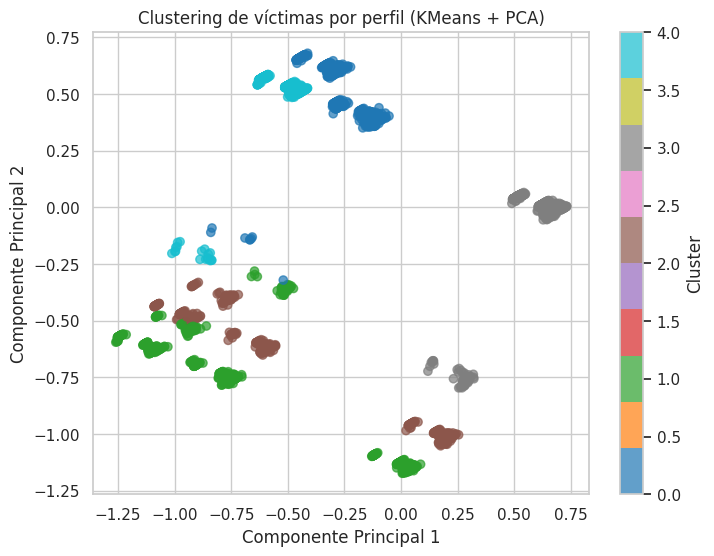

In [ ]:
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# 1. Filtrar las variables necesarias
variables = ['Age', 'Gender', 'Race', 'State', 'Armed/Unarmed', 'Fleeing/Not fleeing']
# Usar df_limpio_2013 que ya tiene los NaNs eliminados
df_cluster = df_limpio_2013[variables].copy()

# 2. Preprocesamiento: escalar numéricos y codificar categóricas
preprocesador = ColumnTransformer([
    ('num', MinMaxScaler(), ['Age']),
    ('cat', OneHotEncoder(drop='first'), ['Gender', 'Race', 'State', 'Armed/Unarmed', 'Fleeing/Not fleeing'])
])

# 3. Transformar los datos
X = preprocesador.fit_transform(df_cluster)

# 4. Aplicar KMeans con K=5
kmeans = KMeans(n_clusters=5, random_state=42, n_init=10) # Added n_init explicitly
kmeans.fit(X)
df_cluster['Cluster'] = kmeans.labels_

# 5. Analizar los resultados
print("Cantidad de registros por cluster:")
print(df_cluster['Cluster'].value_counts())

print("\nPromedio de edad por cluster:")
print(df_cluster.groupby('Cluster')['Age'].mean())

# 6. Visualización en 2D usando PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.figure(figsize=(8,6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df_cluster['Cluster'], cmap='tab10', alpha=0.7)
plt.title("Clustering de víctimas por perfil (KMeans + PCA)")
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()

In [ ]:
df_cluster['Cluster'] = kmeans.labels_


<ipython-input-23-4a3163895689>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Cluster', data=df_cluster, palette='Set2')


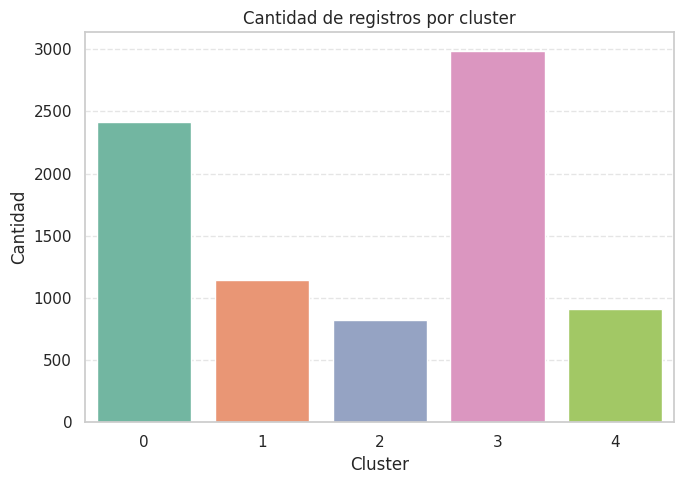

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(7, 5))
sns.countplot(x='Cluster', data=df_cluster, palette='Set2')
plt.title('Cantidad de registros por cluster')
plt.xlabel('Cluster')
plt.ylabel('Cantidad')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


<ipython-input-24-ac0ec1e7ecb7>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster', y='Age', data=df_cluster, palette='pastel')


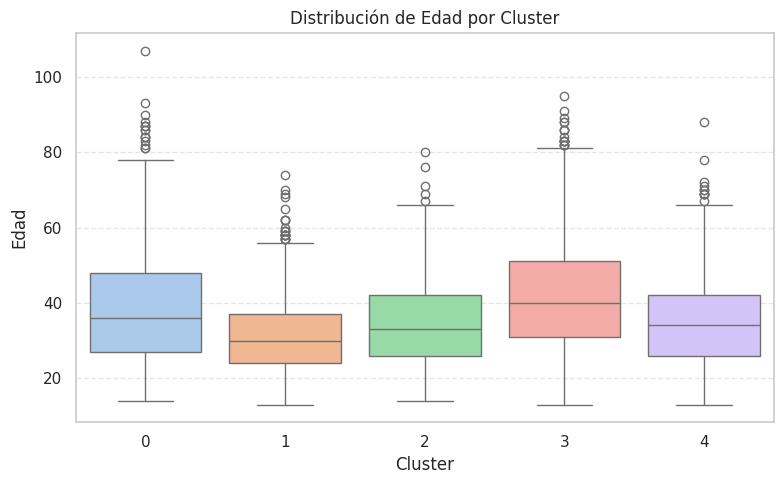

In [ ]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='Cluster', y='Age', data=df_cluster, palette='pastel')
plt.title('Distribución de Edad por Cluster')
plt.xlabel('Cluster')
plt.ylabel('Edad')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


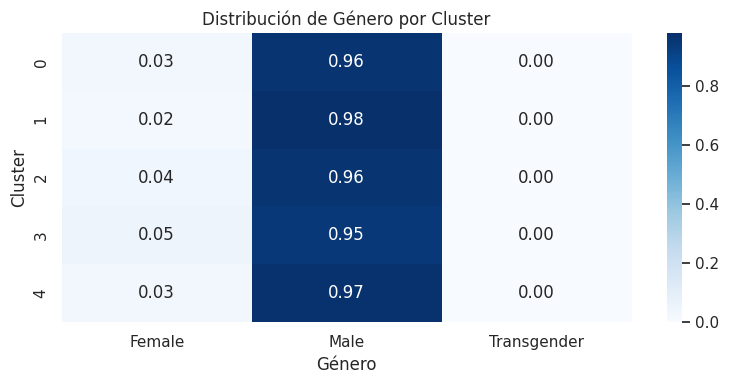

In [ ]:
# Tabla cruzada normalizada por cluster
tabla = pd.crosstab(df_cluster['Cluster'], df_cluster['Gender'], normalize='index')

plt.figure(figsize=(8, 4))
sns.heatmap(tabla, annot=True, cmap='Blues', fmt='.2f')
plt.title('Distribución de Género por Cluster')
plt.ylabel('Cluster')
plt.xlabel('Género')
plt.tight_layout()
plt.show()


In [ ]:
#Edad promedio por cluster
print(df_cluster.groupby('Cluster')['Age'].mean().round(1))


Cluster
0    38.5
1    31.1
2    34.6
3    41.7
4    35.0
Name: Age, dtype: float64


In [ ]:

df_cluster_filtered_gender = df_cluster[df_cluster['Gender'] != 'Transgender'].copy()


print("Distribución de género por cluster (excluyendo Transgender por ser NA):")
print(df_cluster_filtered_gender.groupby('Cluster')['Gender'].value_counts(normalize=True).unstack().round(2))

Distribución de género por cluster (excluyendo Transgender por ser NA):
Gender   Female  Male
Cluster              
0          0.03  0.97
1          0.02  0.98
2          0.04  0.96
3          0.05  0.95
4          0.03  0.97


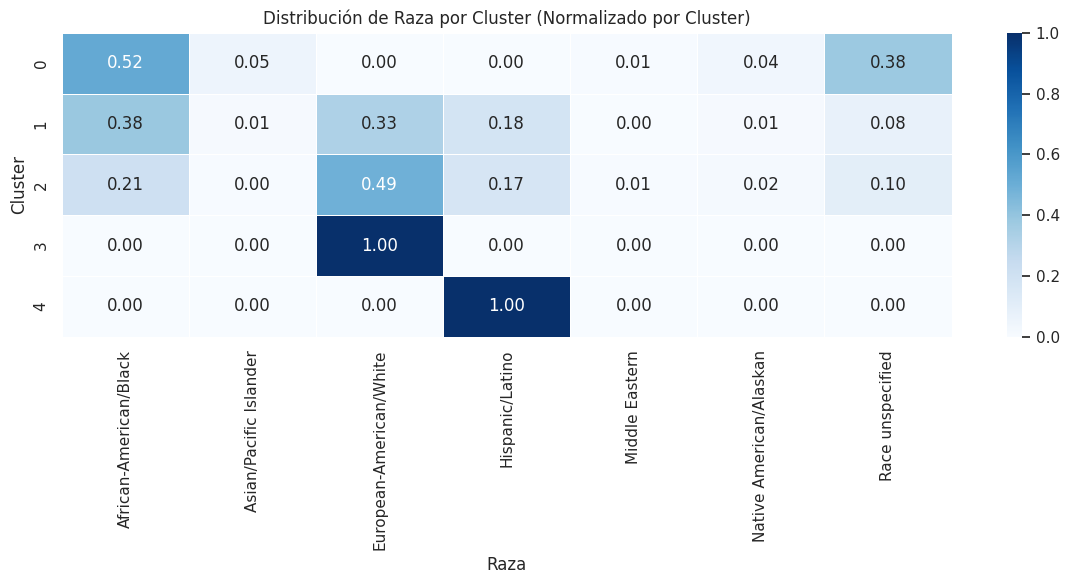

In [ ]:
# Tabla cruzada normalizada por cluster
tabla = pd.crosstab(df_cluster['Cluster'], df_cluster['Race'], normalize='index')

plt.figure(figsize=(12, 6)) # Ajustar el tamaño para mejor visualización si hay muchas razas
sns.heatmap(tabla, annot=True, cmap='Blues', fmt='.2f', linewidths=.5) # Añadir linewidths para separar celdas
plt.title('Distribución de Raza por Cluster (Normalizado por Cluster)')
plt.ylabel('Cluster')
plt.xlabel('Raza')
plt.tight_layout()
plt.show()

In [ ]:
# Estado con más casos en cada cluster
estado_mas_comun = df_cluster.groupby('Cluster')['State'].agg(lambda x: x.value_counts().idxmax())
print(estado_mas_comun)

Cluster
0    CA
1    CA
2    CA
3    CA
4    CA
Name: State, dtype: object


In [ ]:
#Armado o desarmado por cluster
armado = df_cluster.groupby('Cluster')['Armed/Unarmed'].agg(lambda x: x.value_counts().idxmax())
print(armado)

Cluster
0    Armed
1    Armed
2    Armed
3    Armed
4    Armed
Name: Armed/Unarmed, dtype: object


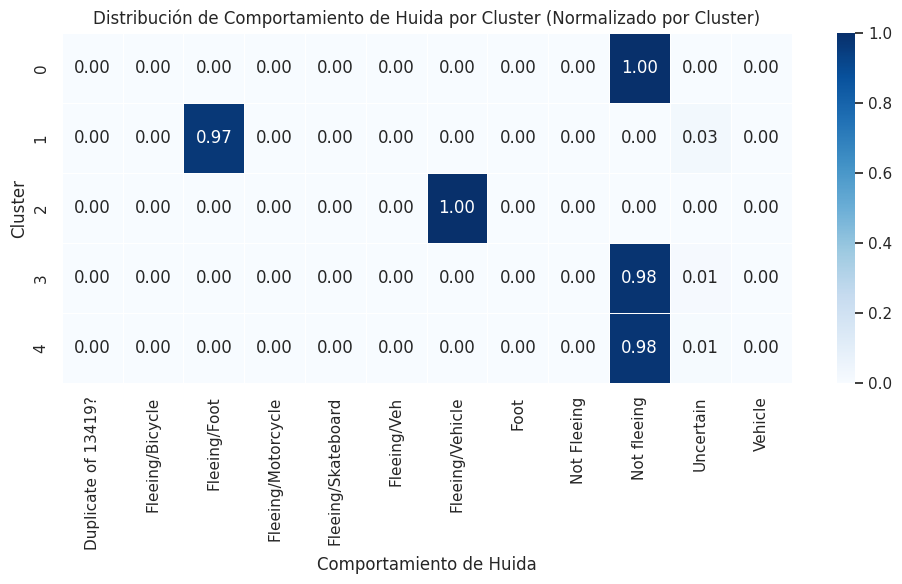

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Asegúrate de que df_cluster contiene los datos que quieres visualizar,
# incluyendo la columna 'Cluster' y la columna 'Fleeing/Not fleeing'.

# Calcular la tabla cruzada normalizada por clúster
# Rellenar NaN con 0 para que el heatmap se vea mejor si hay categorías que no aparecen en algunos clusters
tabla_fleeing = pd.crosstab(df_cluster['Cluster'], df_cluster['Fleeing/Not fleeing'], normalize='index').fillna(0)

plt.figure(figsize=(10, 6)) # Ajusta el tamaño según la cantidad de columnas resultantes
sns.heatmap(tabla_fleeing, annot=True, cmap='Blues', fmt='.2f', linewidths=.5)
plt.title('Distribución de Comportamiento de Huida por Cluster (Normalizado por Cluster)')
plt.ylabel('Cluster')
plt.xlabel('Comportamiento de Huida')
plt.tight_layout()
plt.show()

<ipython-input-32-a41f5f1e2ed3>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=state_counts.index, y=state_counts.values, palette='viridis')


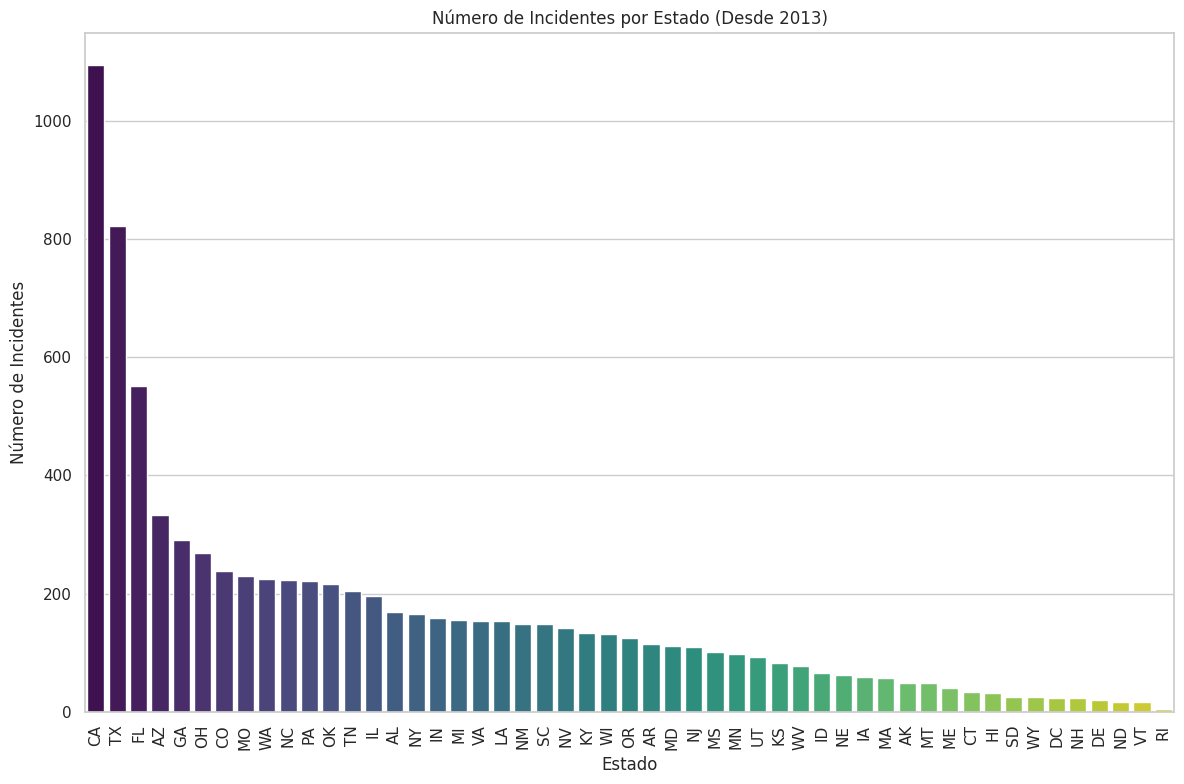

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

state_counts = df_limpio_2013['State'].value_counts()

plt.figure(figsize=(12, 8))
sns.barplot(x=state_counts.index, y=state_counts.values, palette='viridis')
plt.title('Número de Incidentes por Estado (Desde 2013)')
plt.xlabel('Estado')
plt.ylabel('Número de Incidentes')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [ ]:
# Limpiar las columnas 'Latitude' y 'Longitude': eliminar comas y convertir a numérico
# Convertir a string para aplicar str.replace
df_limpio_2013['Latitude'] = df_limpio_2013['Latitude'].astype(str).str.replace(',', '.', regex=False)
df_limpio_2013['Longitude'] = df_limpio_2013['Longitude'].astype(str).str.replace(',', '.', regex=False)

# Convertir a numérico, los errores se convertirán a NaN
df_limpio_2013['Latitude'] = pd.to_numeric(df_limpio_2013['Latitude'], errors='coerce')
df_limpio_2013['Longitude'] = pd.to_numeric(df_limpio_2013['Longitude'], errors='coerce')

# Eliminar filas donde 'Latitude' o 'Longitude' sean NaN después de la conversión
df_limpio_2013.dropna(subset=['Latitude', 'Longitude'], inplace=True)

print(f"\nNúmero de filas después de limpiar y eliminar NaNs en 'Latitude'/'Longitude': {df_limpio_2013.shape[0]}")


Número de filas después de limpiar y eliminar NaNs en 'Latitude'/'Longitude': 7793


<ipython-input-33-81ecf57d3560>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_limpio_2013['Latitude'] = df_limpio_2013['Latitude'].astype(str).str.replace(',', '.', regex=False)
<ipython-input-33-81ecf57d3560>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_limpio_2013['Longitude'] = df_limpio_2013['Longitude'].astype(str).str.replace(',', '.', regex=False)
<ipython-input-33-81ecf57d3560>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[

In [ ]:
import pandas as pd
import plotly.express as px


conteo_estados = df_limpio_2013['State'].value_counts().reset_index()
conteo_estados.columns = ['State', 'Cantidad']


fig = px.choropleth(
    conteo_estados,
    locations='State',
    locationmode='USA-states',
    color='Cantidad',
    scope='usa',
    color_continuous_scale='Reds',
    title='Cantidad de casos por estado'
)

fig.show()

#Análisis de sentimientos

In [ ]:
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from textblob import TextBlob
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt


In [ ]:
try:
    nltk.download('stopwords', quiet=True)
    nltk.download('wordnet', quiet=True)
    nltk.download('omw-1.4', quiet=True)
except Exception as e:
    print(f"Error al descargar datos de NLTK: {e}")


In [ ]:
# Asegurar que la columna no tenga valores nulos y sea de tipo string
df_limpio_2013['Brief description'] = df_limpio_2013['Brief description'].fillna('').astype(str)

# Función para limpiar el texto
def clean_text(text):
    text = text.lower()  # Convertir a minúsculas
    text = re.sub(r'[^a-z\s]', '', text)  # Eliminar caracteres especiales y números
    text = re.sub(r'\s+', ' ', text).strip()  # Eliminar espacios extra
    words = text.split()
    stop_words = set(stopwords.words('english'))  # Palabras vacías en inglés
    words = [word for word in words if word not in stop_words]  # Eliminar stopwords
    lemmatizer = WordNetLemmatizer()
    words = [lemmatizer.lemmatize(word) for word in words]  # Lematización
    return ' '.join(words)

# Aplicar la limpieza
df_limpio_2013['cleaned_description'] = df_limpio_2013['Brief description'].apply(clean_text)


<ipython-input-37-4eb4eabebb10>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-37-4eb4eabebb10>:17: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
# Función para obtener polaridad de sentimiento
def analizar_sentimiento(texto):
    blob = TextBlob(texto)
    return blob.sentiment.polarity

# Aplicar análisis de sentimiento
df_limpio_2013['sentiment_polarity'] = df_limpio_2013['cleaned_description'].apply(analizar_sentimiento)

# Clasificar sentimiento
def clasificar_sentimiento(polaridad):
    if polaridad > 0.1:
        return 'Positivo'
    elif polaridad < -0.1:
        return 'Negativo'
    else:
        return 'Neutro'

df_limpio_2013['sentiment_class'] = df_limpio_2013['sentiment_polarity'].apply(clasificar_sentimiento)


<ipython-input-38-b89a8afd4438>:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-38-b89a8afd4438>:18: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
print("Distribución de Sentimiento:")
conteo = df_limpio_2013['sentiment_class'].value_counts()
print(conteo)

# Mostrar primeras filas con las columnas nuevas
from IPython.display import display
display(df_limpio_2013[['Brief description', 'cleaned_description', 'sentiment_polarity', 'sentiment_class']].head())


Distribución de Sentimiento:
sentiment_class
Neutro      4107
Negativo    3330
Positivo     356
Name: count, dtype: int64


Brief description  \
15243  Omaha Police Department responded to a 911 dom...   
15244  Deputies responded to a 911 call of shots fire...   
15246  Christopher was with two others in a car. Pueb...   
15248  An officer responded to a report by Chavez tha...   
15249  Officers responded to reports of gunshots at a...   

                                     cleaned_description  sentiment_polarity  \
15243  omaha police department responded domestic dis...           -0.054545   
15244  deputy responded call shot fired andrew l clos...            0.200000   
15246  christopher two others car pueblo police offic...           -0.100000   
15248  officer responded report chavez killed woman c...           -0.133333   
15249  officer responded report gunshot apartment com...           -0.094805   

      sentiment_class  
15243          Neutro  
15244        Positivo  
15246          Neutro  
15248        Negativo  
15249          Neutro

In [ ]:
# Agrupar descripciones por clase de sentimiento
descripciones_positivas = ' '.join(df_limpio_2013[df_limpio_2013['sentiment_class'] == 'Positivo']['cleaned_description'])
descripciones_negativas = ' '.join(df_limpio_2013[df_limpio_2013['sentiment_class'] == 'Negativo']['cleaned_description'])

# Contar frecuencia de palabras
word_counts_pos = Counter(descripciones_positivas.split())
word_counts_neg = Counter(descripciones_negativas.split())

# Palabras más frecuentes en positivo
distinct_positive_words = {word: count for word, count in word_counts_pos.items()
                           if count > word_counts_neg.get(word, 0)}

# Palabras más frecuentes en negativo
distinct_negative_words = {word: count for word, count in word_counts_neg.items()
                           if count > word_counts_pos.get(word, 0)}

# Mostrar top N palabras distintas
top_n = 20
print("\nPalabras más frecuentes en descripciones positivas (distintas de las negativas):")
for word, count in sorted(distinct_positive_words.items(), key=lambda item: item[1], reverse=True)[:top_n]:
    print(f"{word}: {count}")

print("\nPalabras más frecuentes en descripciones negativas (distintas de las positivas):")
for word, count in sorted(distinct_negative_words.items(), key=lambda item: item[1], reverse=True)[:top_n]:
    print(f"{word}: {count}")



Palabras más frecuentes en descripciones positivas (distintas de las negativas):
striking: 45
advanced: 42
able: 35
first: 31
justified: 21
grand: 21
outstanding: 20
sexual: 18
light: 17
club: 14
right: 14
jury: 13
morris: 13
large: 12
rose: 12
caliber: 12
ruled: 11
attorney: 10
motorcycle: 10
crowd: 10

Palabras más frecuentes en descripciones negativas (distintas de las positivas):
officer: 3993
police: 3890
shot: 3684
killed: 3027
deputy: 1457
man: 1344
allegedly: 1277
gun: 1063
said: 1022
home: 876
vehicle: 633
knife: 633
responded: 624
fired: 584
car: 560
found: 556
handgun: 534
arrived: 533
two: 532
reportedly: 532


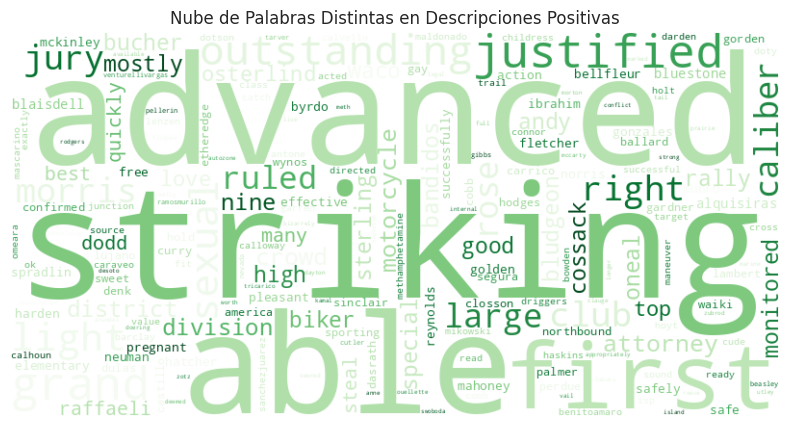

In [ ]:
# Nube para palabras positivas distintas
wordcloud_positivo = WordCloud(width=800, height=400, background_color='white',
                               colormap='Greens').generate_from_frequencies(distinct_positive_words)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_positivo, interpolation='bilinear')
plt.axis('off')
plt.title('Nube de Palabras Distintas en Descripciones Positivas')
plt.show()


<ipython-input-42-e8b005f077f8>:7: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.



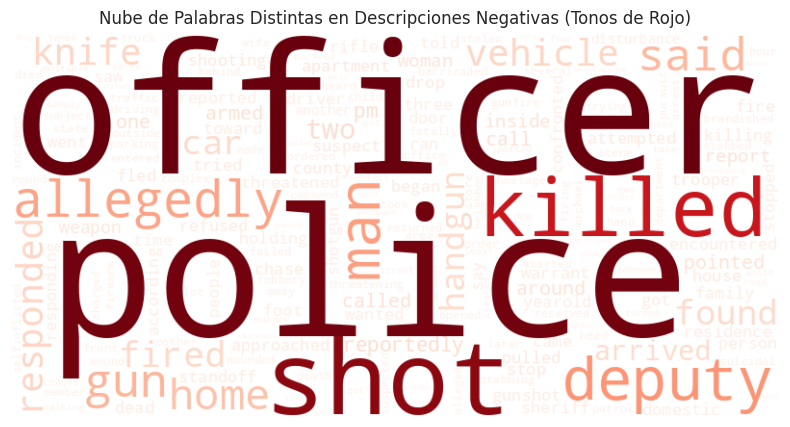

In [ ]:
# Función para colorear en tonos rojos
def red_shades_color_func_distinct(word=None, **kwargs):
    try:
        max_freq = max(distinct_negative_words.values())
        freq = distinct_negative_words[word]
        normalized_freq = freq / (max_freq + 1e-6)
        cmap = plt.cm.get_cmap('Reds')
        rgb = cmap(normalized_freq)[:3]
        return "rgb({}, {}, {})".format(int(rgb[0]*255), int(rgb[1]*255), int(rgb[2]*255))
    except Exception as e:
        print(f"Error al colorear la palabra '{word}': {e}")
        return "rgb(128, 0, 0)"  # Rojo oscuro por defecto

# Nube para palabras negativas distintas
wordcloud_negativo = WordCloud(width=800, height=400, background_color='white',
                               color_func=red_shades_color_func_distinct).generate_from_frequencies(distinct_negative_words)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_negativo, interpolation='bilinear')
plt.axis('off')
plt.title('Nube de Palabras Distintas en Descripciones Negativas (Tonos de Rojo)')
plt.show()


<ipython-input-43-817f7193291a>:9: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




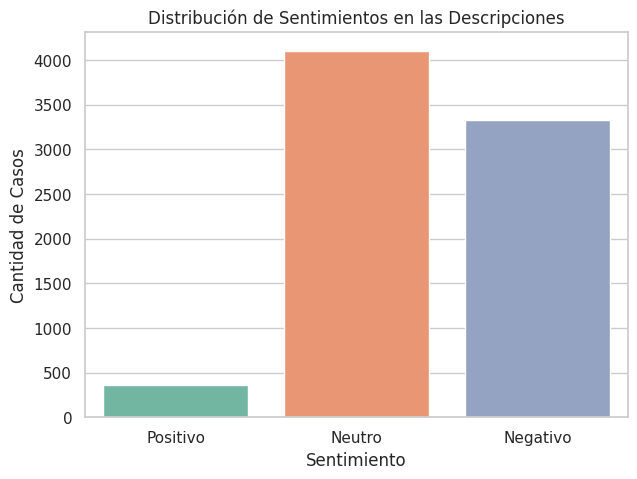

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Estilo
sns.set(style="whitegrid")

# Gráfico
plt.figure(figsize=(7, 5))
sns.countplot(x='sentiment_class', data=df_limpio_2013, order=['Positivo', 'Neutro', 'Negativo'], palette='Set2')
plt.title('Distribución de Sentimientos en las Descripciones')
plt.xlabel('Sentimiento')
plt.ylabel('Cantidad de Casos')
plt.show()


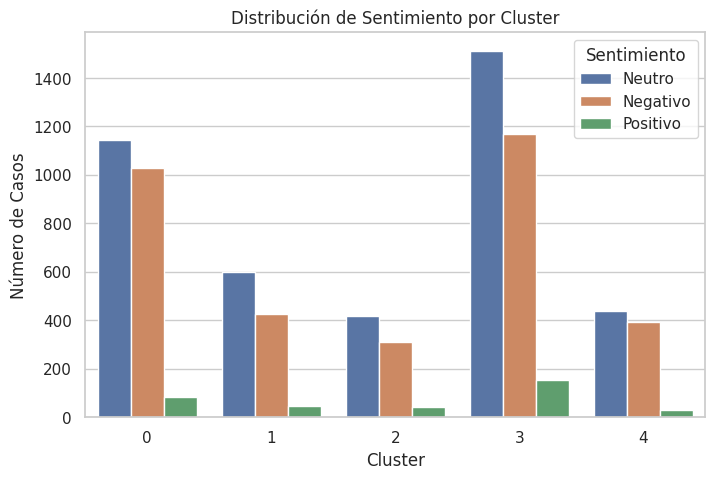

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from textblob import TextBlob
import pandas as pd

# Asegúrate de que df_cluster tenga las etiquetas correctas
df_cluster['Cluster'] = kmeans.labels_

# Hacemos una intersección por índice para garantizar alineación segura
df_limpio_2013 = df_limpio_2013.copy()
df_limpio_2013['Cluster'] = df_cluster.loc[df_limpio_2013.index, 'Cluster']

# Estilo
sns.set(style="whitegrid")

# Gráfico
plt.figure(figsize=(8, 5))
sns.countplot(data=df_limpio_2013, x='Cluster', hue='sentiment_class')
plt.title('Distribución de Sentimiento por Cluster')
plt.xlabel('Cluster')
plt.ylabel('Número de Casos')
plt.legend(title='Sentimiento')
plt.show()


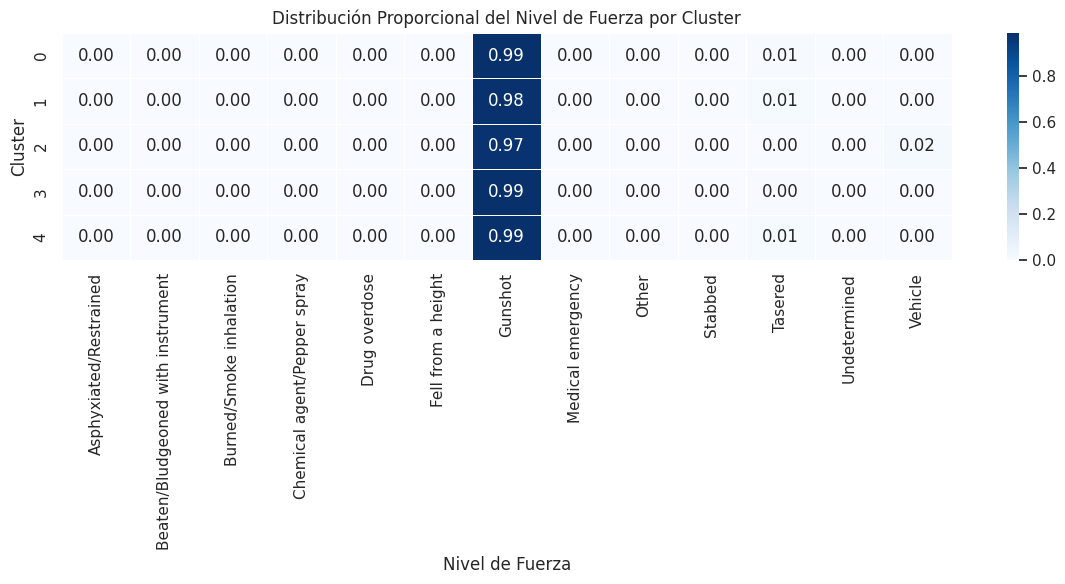

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Asegúrate de que df_limpio_2013 y la columna 'Cluster' existen

# Calcular la tabla cruzada
# Rellenar NaN con 0 para que el heatmap se vea mejor
tabla_fuerza_cluster = pd.crosstab(df_limpio_2013['Cluster'], df_limpio_2013['Highest level of force'], normalize='index').fillna(0)

plt.figure(figsize=(12, 6)) # Ajusta el tamaño según la cantidad de tipos de fuerza
sns.heatmap(tabla_fuerza_cluster, annot=True, cmap='Blues', fmt='.2f', linewidths=.5)
plt.title('Distribución Proporcional del Nivel de Fuerza por Cluster')
plt.ylabel('Cluster')
plt.xlabel('Nivel de Fuerza')
plt.tight_layout()
plt.show()

<ipython-input-46-8471e1ce6c30>:12: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




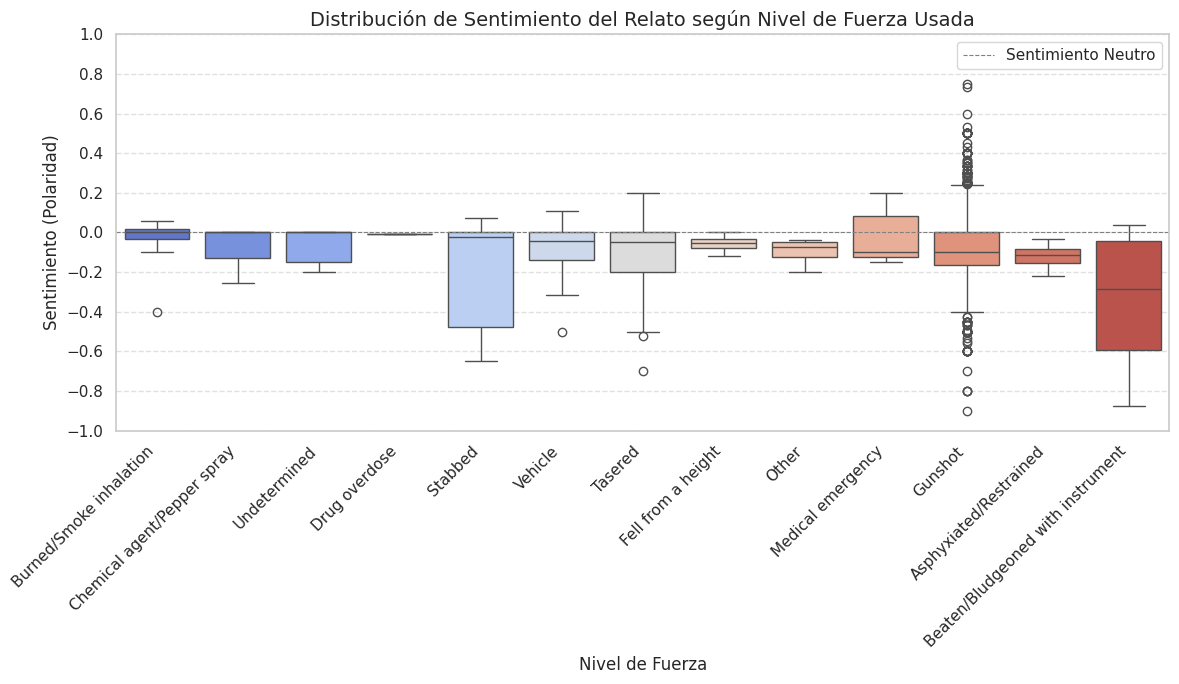

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Asegúrate de que df_limpio_2013 existe y contiene las columnas necesarias.

# Esto puede ayudar a visualizar una posible tendencia.
# Calcula la mediana de sentimiento para cada nivel de fuerza
median_sentiment_order = df_limpio_2013.groupby('Highest level of force')['sentiment_polarity'].median().sort_values(ascending=False).index

plt.figure(figsize=(12, 7))
sns.boxplot(data=df_limpio_2013,
            x='Highest level of force',
            y='sentiment_polarity',
            palette='coolwarm',
            order=median_sentiment_order)

plt.title('Distribución de Sentimiento del Relato según Nivel de Fuerza Usada', fontsize=14)
plt.xlabel('Nivel de Fuerza', fontsize=12)
plt.ylabel('Sentimiento (Polaridad)', fontsize=12) # Etiqueta más descriptiva
plt.axhline(0, color='gray', linestyle='--', linewidth=0.8, label='Sentimiento Neutro') # Línea de referencia para sentimiento neutro

plt.xticks(rotation=45, ha='right') # Rotar etiquetas del eje x y alinearlas a la derecha
plt.yticks(np.arange(-1, 1.1, 0.2)) # Establecer ticks en el eje y
plt.grid(axis='y', linestyle='--', alpha=0.6) # Añadir cuadrícula en el eje y

plt.legend() # Mostrar la leyenda de la línea neutra
plt.tight_layout()
plt.show()

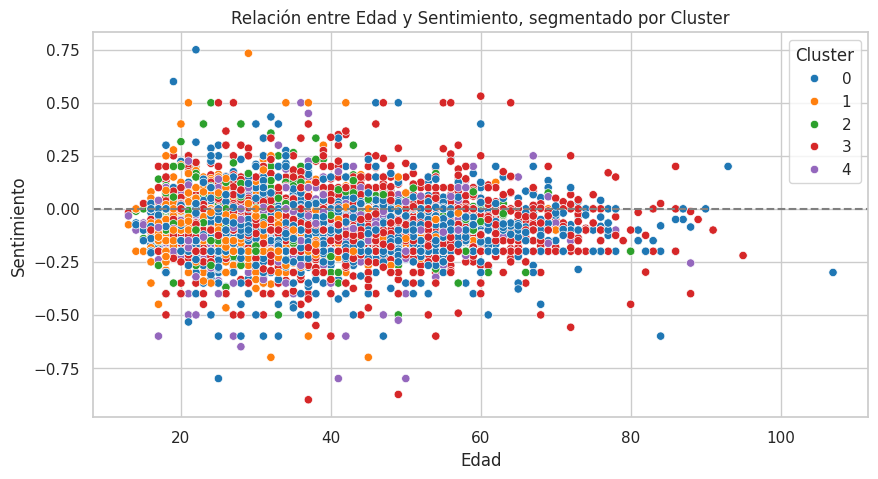

In [ ]:
plt.figure(figsize=(10, 5))
sns.scatterplot(data=df_limpio_2013, x='Age', y='sentiment_polarity', hue='Cluster', palette='tab10')
plt.title('Relación entre Edad y Sentimiento, segmentado por Cluster')
plt.xlabel('Edad')
plt.ylabel('Sentimiento')
plt.axhline(0, color='gray', linestyle='--')
plt.show()


In [ ]:
resumen = df_limpio_2013.groupby('Cluster').agg({
    'Age': 'mean',
    'Race': lambda x: x.value_counts().idxmax(),
    'Gender': lambda x: x.value_counts().idxmax(),
    'Highest level of force': lambda x: x.value_counts().idxmax(),
    'sentiment_polarity': 'mean'
}).rename(columns={'Age': 'Edad promedio', 'sentiment_polarity': 'Sentimiento promedio'})

print("Resumen por Cluster:")
print(resumen)


Resumen por Cluster:
         Edad promedio                     Race Gender Highest level of force  \
Cluster                                                                         
0            38.670510   African-American/Black   Male                Gunshot   
1            31.166978   African-American/Black   Male                Gunshot   
2            34.796368  European-American/White   Male                Gunshot   
3            41.572990  European-American/White   Male                Gunshot   
4            34.954598          Hispanic/Latino   Male                Gunshot   

         Sentimiento promedio  
Cluster                        
0                   -0.095637  
1                   -0.081770  
2                   -0.078405  
3                   -0.084461  
4                   -0.094206  


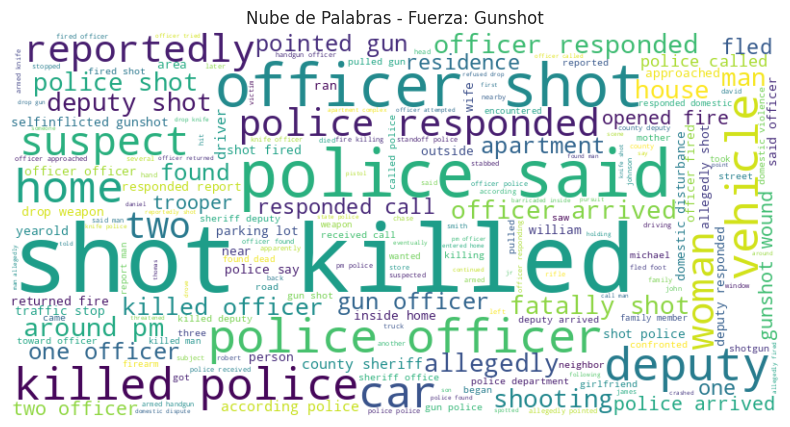

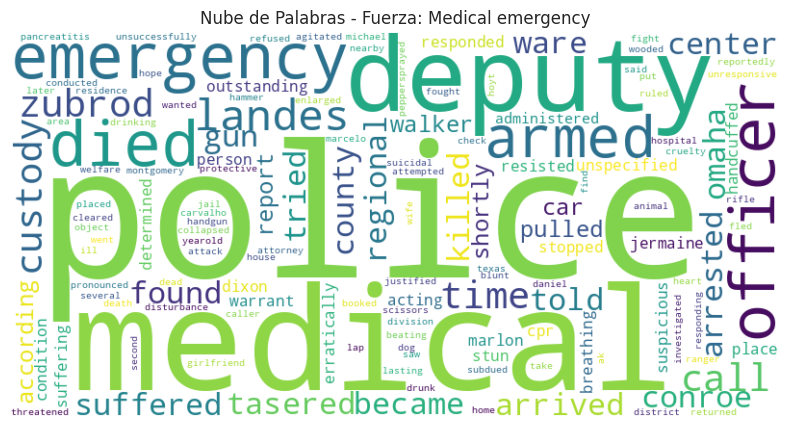

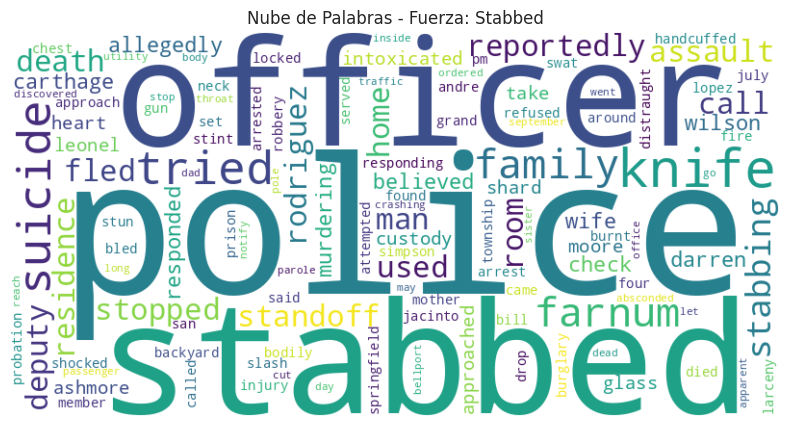

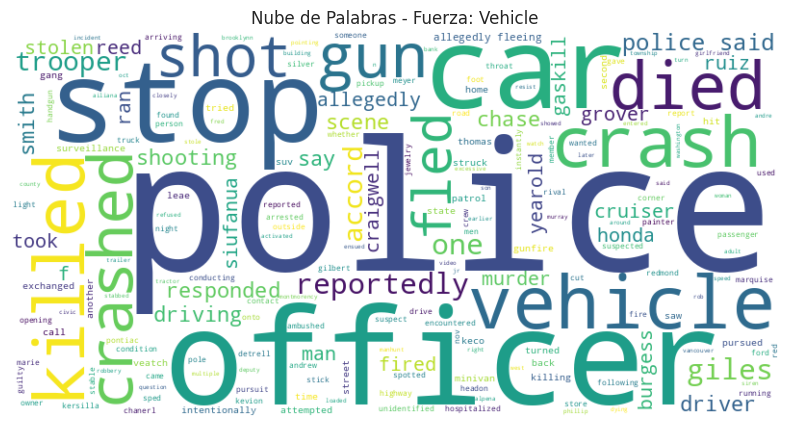

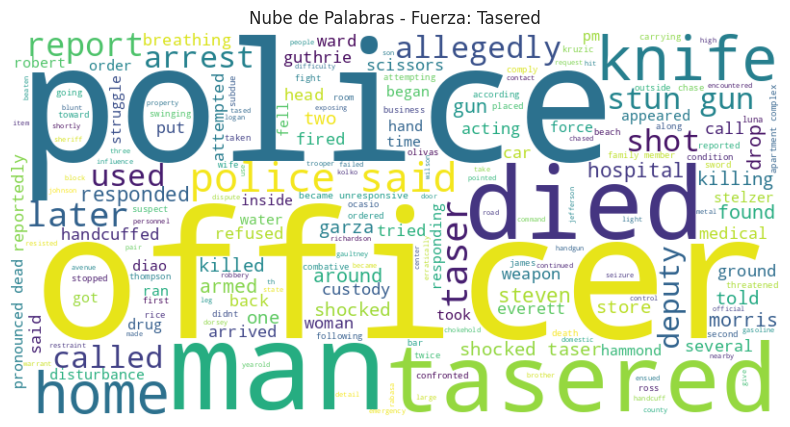

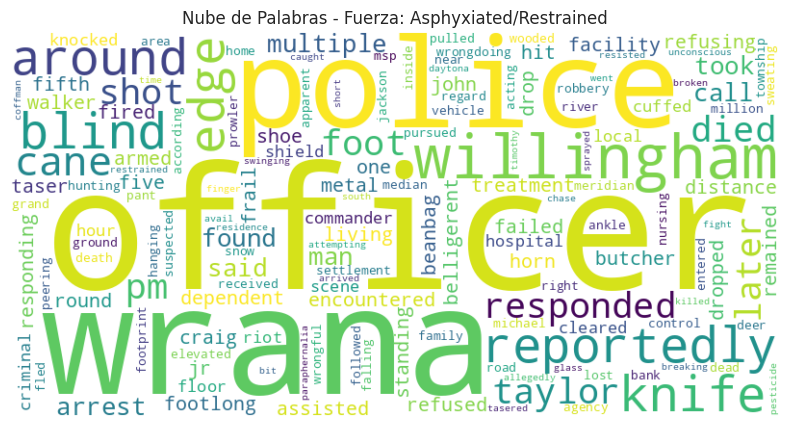

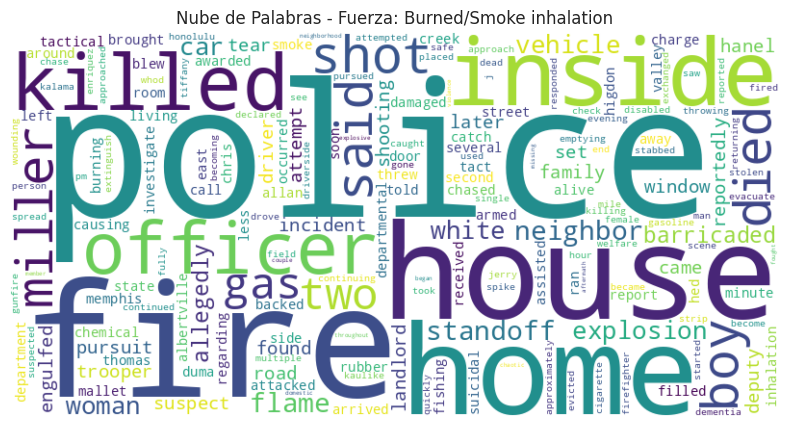

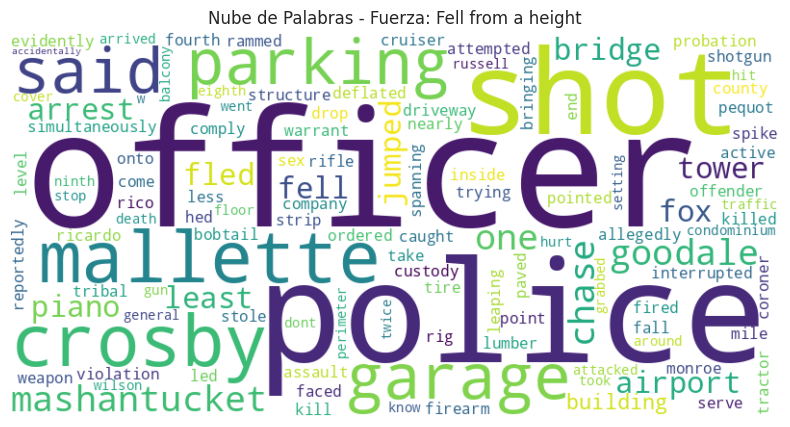

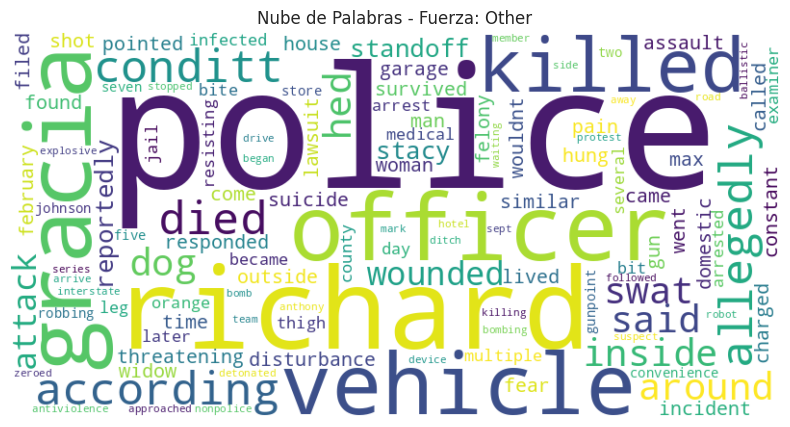

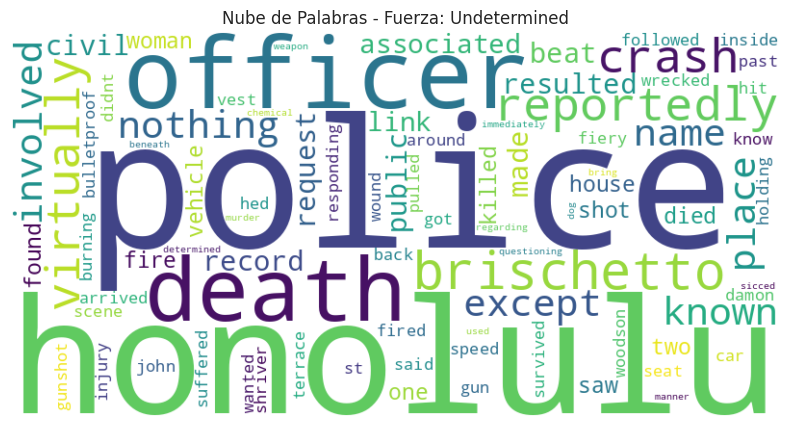

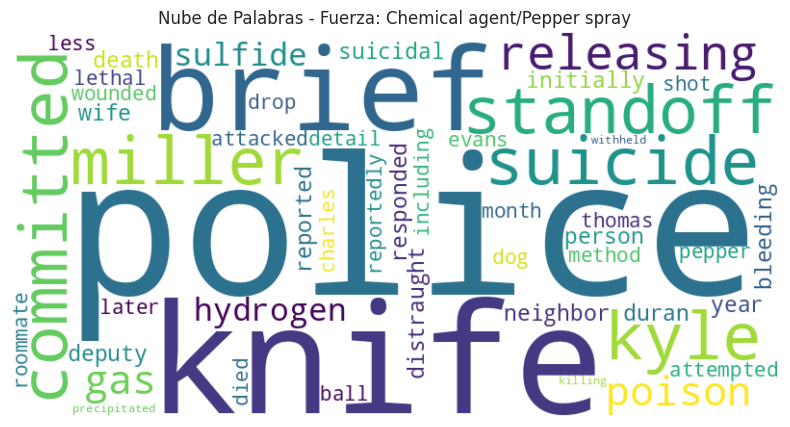

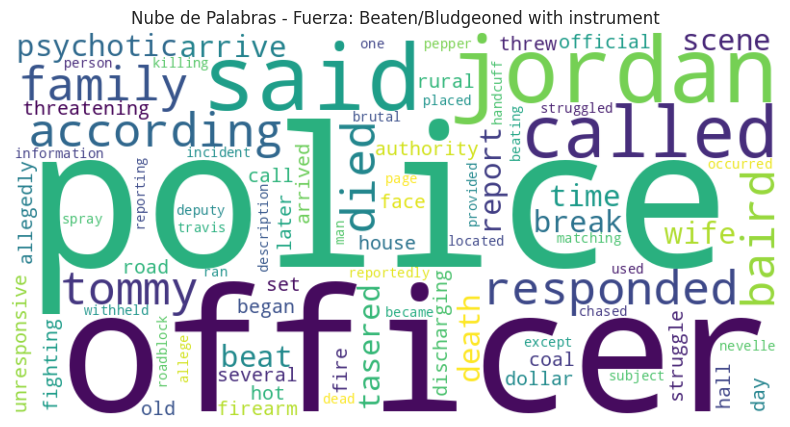

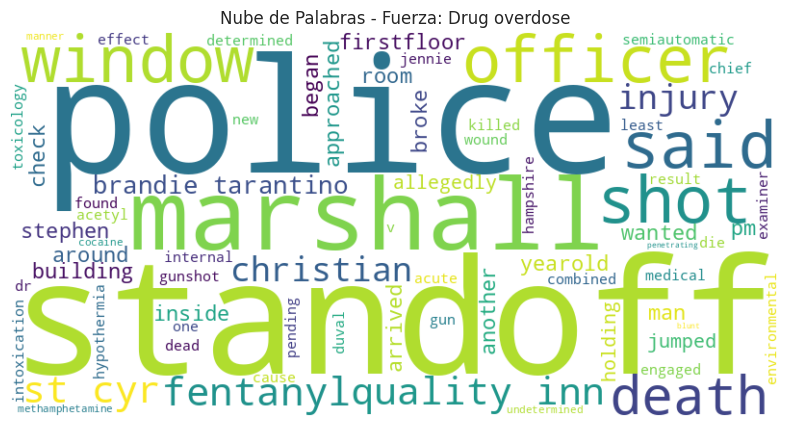

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

for tipo in df_limpio_2013['Highest level of force'].dropna().unique():
    texto = ' '.join(df_limpio_2013[df_limpio_2013['Highest level of force'] == tipo]['cleaned_description'].dropna())
    wc = WordCloud(width=800, height=400, background_color='white').generate(texto)

    plt.figure(figsize=(10, 5))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Nube de Palabras - Fuerza: {tipo}')
    plt.show()


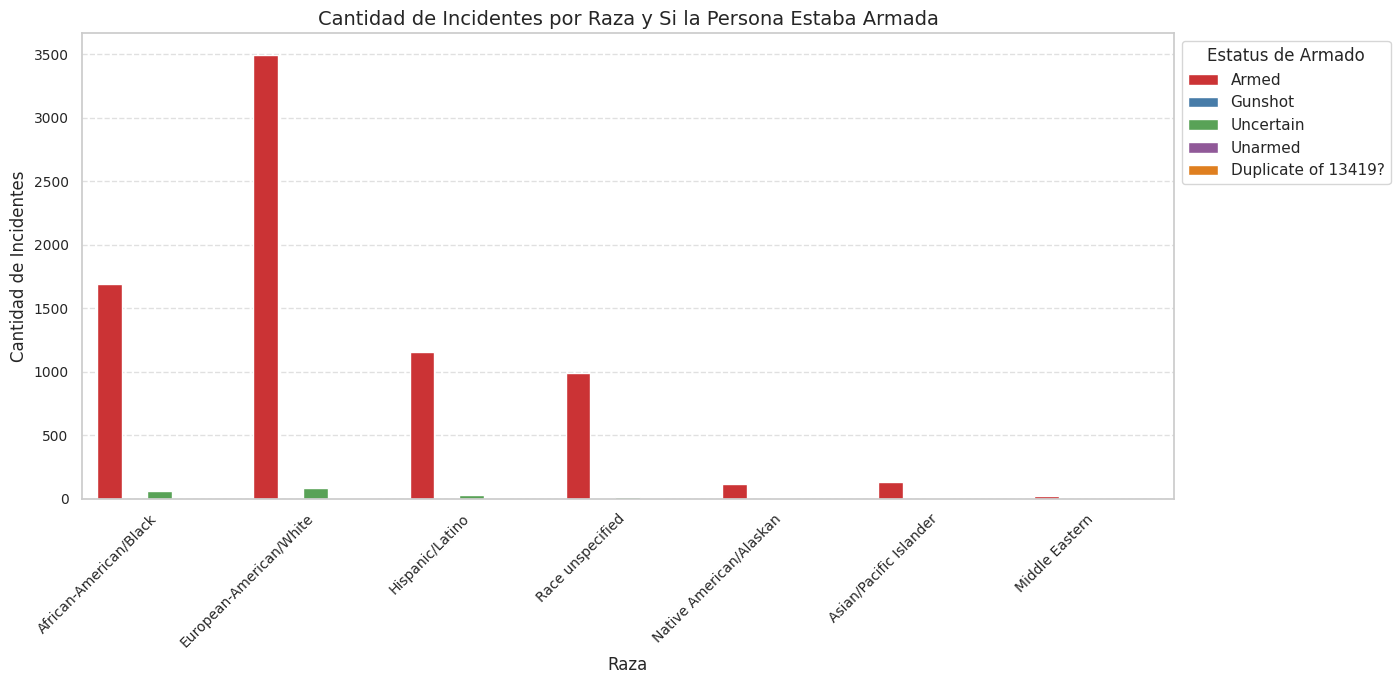

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Asegúrate de que df_limpio_2013 existe y contiene las columnas 'Race' y 'Armed/Unarmed'.

plt.figure(figsize=(12, 7))
ax = sns.countplot(data=df_limpio_2013, x='Race', hue='Armed/Unarmed', palette='Set1')

plt.title('Cantidad de Incidentes por Raza y Si la Persona Estaba Armada', fontsize=14)
plt.xlabel('Raza', fontsize=12) # Etiqueta del eje x
plt.ylabel('Cantidad de Incidentes', fontsize=12) # Etiqueta del eje y

plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)

plt.grid(axis='y', linestyle='--', alpha=0.6) # Añade una cuadrícula en el eje y

plt.tight_layout()

sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1), title='Estatus de Armado')

plt.show()

<ipython-input-51-ddbe6166258c>:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




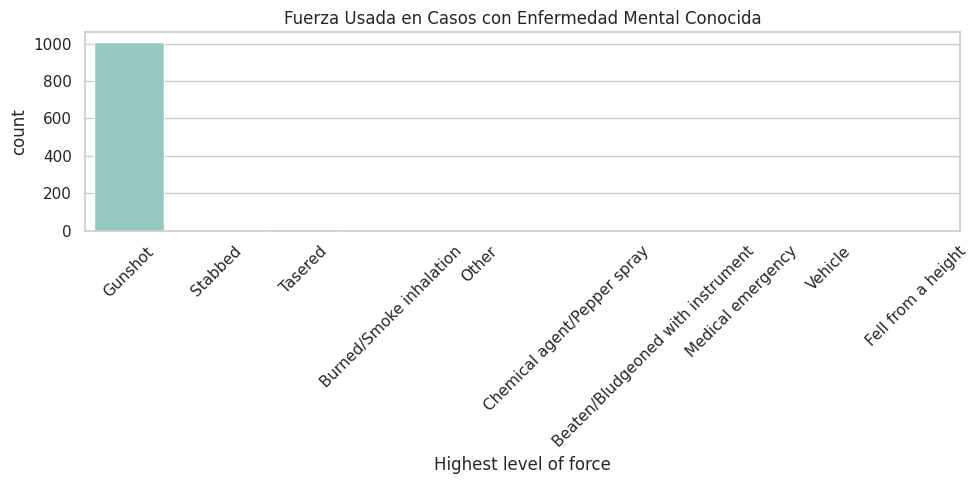

In [ ]:
df_mental = df_limpio_2013[df_limpio_2013['Foreknowledge of mental illness? INTERNAL USE, NOT FOR ANALYSIS'] == 'Yes']

plt.figure(figsize=(10, 5))
sns.countplot(data=df_mental, x='Highest level of force', palette='Set3')
plt.title('Fuerza Usada en Casos con Enfermedad Mental Conocida')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


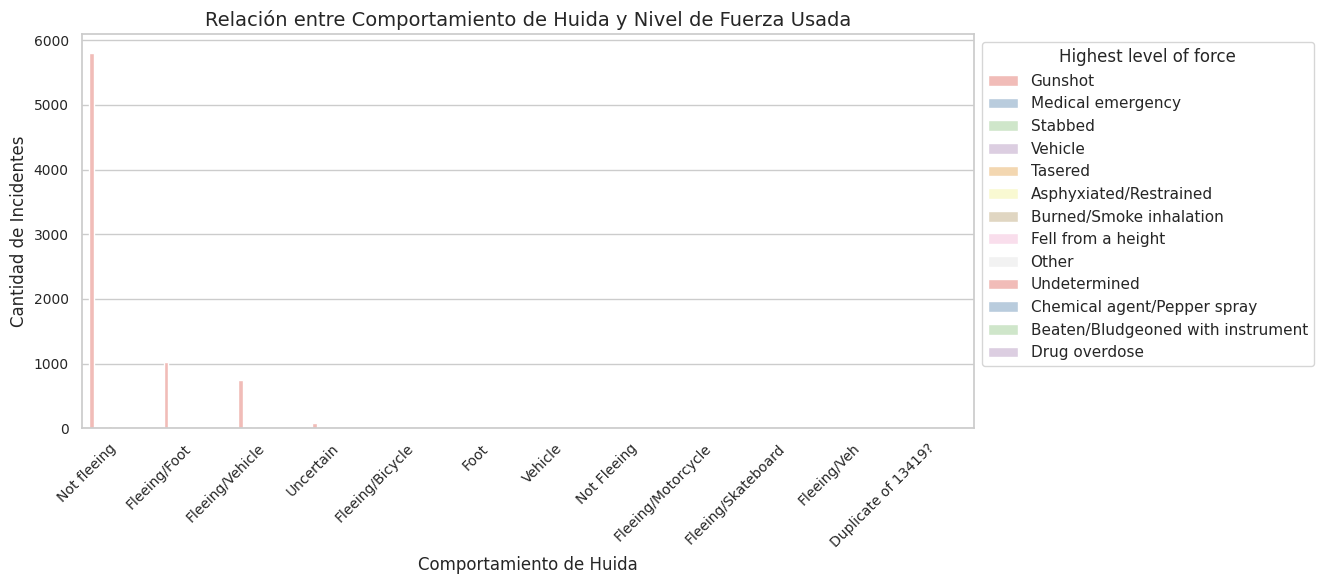

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
ax = sns.countplot(data=df_limpio_2013, x='Fleeing/Not fleeing', hue='Highest level of force', palette='Pastel1')
plt.title('Relación entre Comportamiento de Huida y Nivel de Fuerza Usada', fontsize=14)
plt.xlabel('Comportamiento de Huida', fontsize=12) # Etiqueta más descriptiva
plt.ylabel('Cantidad de Incidentes', fontsize=12) # Etiqueta más descriptiva

plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10) # Ajusta el tamaño de fuente de las etiquetas del eje y

plt.tight_layout()

# Mover la leyenda fuera del gráfico para que no tape las barras
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

plt.show()

<ipython-input-53-677f27745306>:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




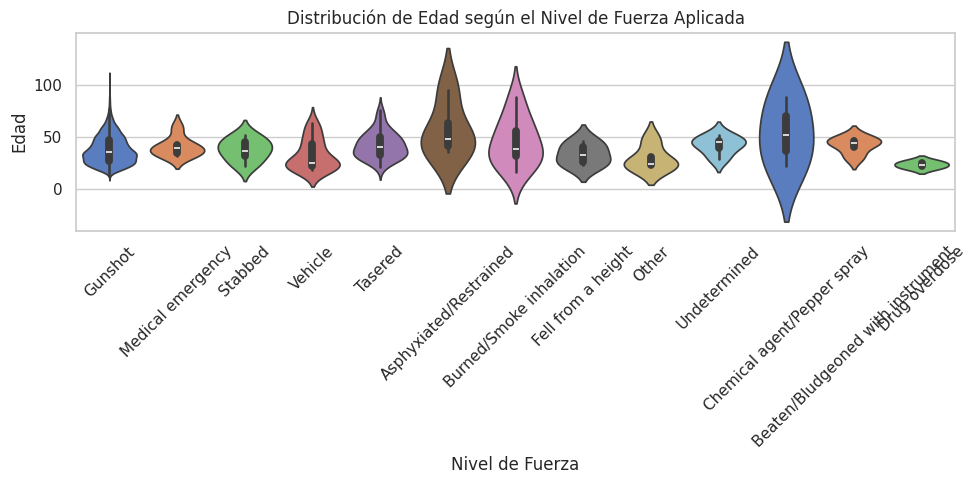

In [ ]:
plt.figure(figsize=(10, 5))
sns.violinplot(data=df_limpio_2013, x='Highest level of force', y='Age', palette='muted')
plt.title('Distribución de Edad según el Nivel de Fuerza Aplicada')
plt.xticks(rotation=45)
plt.ylabel('Edad')
plt.xlabel('Nivel de Fuerza')
plt.tight_layout()
plt.show()


<ipython-input-54-13909d008c1a>:8: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




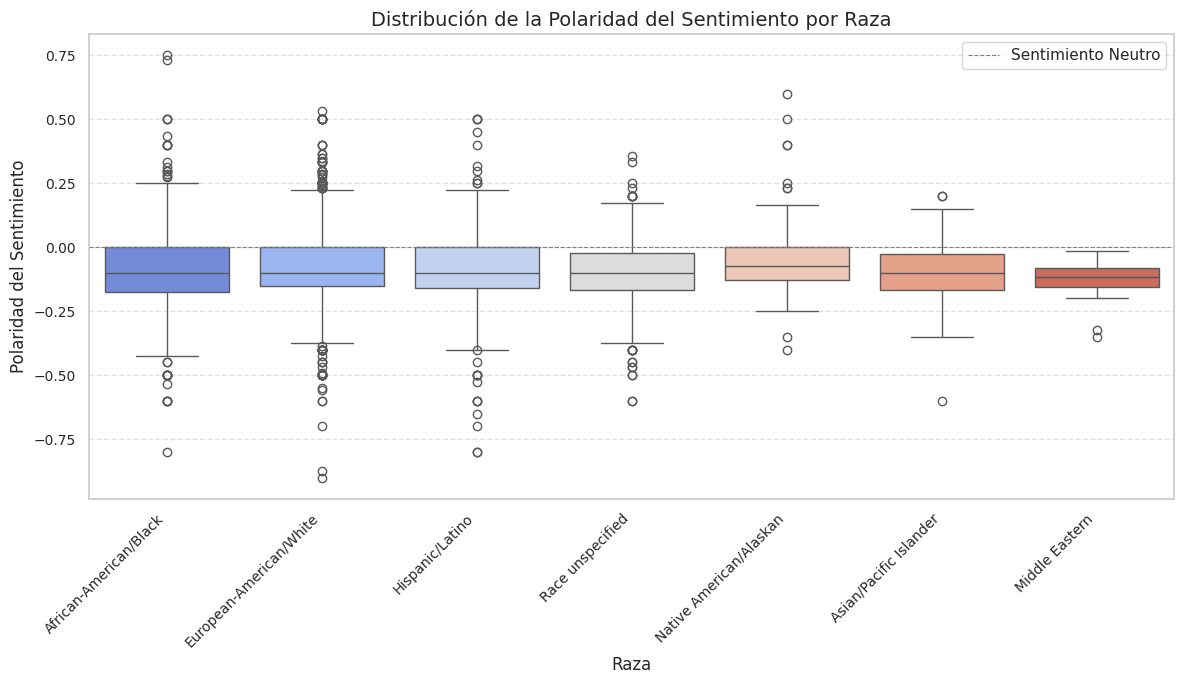

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Asegúrate de que df_limpio_2013 existe y contiene las columnas 'Race' y 'sentiment_polarity'.

plt.figure(figsize=(12, 7))
sns.boxplot(data=df_limpio_2013, x='Race', y='sentiment_polarity', palette='coolwarm')

plt.title('Distribución de la Polaridad del Sentimiento por Raza', fontsize=14)
plt.xlabel('Raza', fontsize=12) # Etiqueta más descriptiva
plt.ylabel('Polaridad del Sentimiento', fontsize=12) # Etiqueta más descriptiva

plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)

plt.axhline(0, color='gray', linestyle='--', linewidth=0.8, label='Sentimiento Neutro') # Añade línea de referencia para sentimiento neutro
plt.grid(axis='y', linestyle='--', alpha=0.6) # Añade cuadrícula en el eje y

plt.legend() # Mostrar la leyenda de la línea neutra
plt.tight_layout()
plt.show()

In [ ]:
# Filtrar las filas donde el 'Highest level of force' es 'Deadly force'
casos_muertos = df_limpio_2013[df_limpio_2013['Highest level of force'] == 'Deadly force'].copy()

# Mostrar las primeras filas de los casos identificados
print("Primeras filas de los casos que terminaron muertos:")
display(casos_muertos.head())

# Mostrar el número total de casos que terminaron muertos
print(f"\nNúmero total de casos que terminaron muertos: {casos_muertos.shape[0]}")

# Mostrar un resumen de las características de estos casos
print("\nResumen de las características de los casos que terminaron muertos:")
display(casos_muertos[['Age', 'Gender', 'Race', 'State', 'Armed/Unarmed', 'Fleeing/Not fleeing', 'sentiment_class']].describe(include='all'))

# Ver la distribución por cluster de los casos muertos
print("\nDistribución por cluster de los casos que terminaron muertos:")
print(casos_muertos['Cluster'].value_counts())

Primeras filas de los casos que terminaron muertos:


Empty DataFrame
Columns: [Age, Gender, Race, Race with imputations, Imputation probability, Date_of_death, City, State, Latitude, Longitude, Highest level of force, Armed/Unarmed, Alleged weapon, Aggressive physical movement, Fleeing/Not fleeing, Brief description, Foreknowledge of mental illness? INTERNAL USE, NOT FOR ANALYSIS, cleaned_description, sentiment_polarity, sentiment_class, Cluster]
Index: []

[0 rows x 21 columns]


Número total de casos que terminaron muertos: 0

Resumen de las características de los casos que terminaron muertos:


Age Gender Race State Armed/Unarmed Fleeing/Not fleeing  \
count   0.0      0    0     0             0                   0   
unique  NaN      0    0     0             0                   0   
top     NaN    NaN  NaN   NaN           NaN                 NaN   
freq    NaN    NaN  NaN   NaN           NaN                 NaN   
mean    NaN    NaN  NaN   NaN           NaN                 NaN   
std     NaN    NaN  NaN   NaN           NaN                 NaN   
min     NaN    NaN  NaN   NaN           NaN                 NaN   
25%     NaN    NaN  NaN   NaN           NaN                 NaN   
50%     NaN    NaN  NaN   NaN           NaN                 NaN   
75%     NaN    NaN  NaN   NaN           NaN                 NaN   
max     NaN    NaN  NaN   NaN           NaN                 NaN   

       sentiment_class  
count                0  
unique               0  
top                NaN  
freq               NaN  
mean               NaN  
std                NaN  
min                NaN  
25%                NaN  
50%                NaN  
75%                NaN  
max                NaN


Distribución por cluster de los casos que terminaron muertos:
Series([], Name: count, dtype: int64)


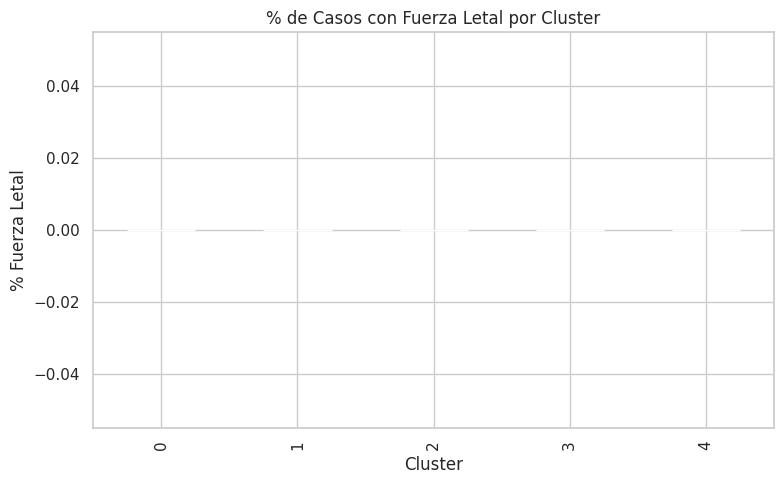

In [ ]:
mortalidad_por_cluster = df_limpio_2013.groupby('Cluster')['Highest level of force'].apply(
    lambda x: (x == 'Deadly force').mean() * 100
)

mortalidad_por_cluster.plot(kind='bar', color='crimson', figsize=(8, 5))
plt.title('% de Casos con Fuerza Letal por Cluster')
plt.ylabel('% Fuerza Letal')
plt.xlabel('Cluster')
plt.tight_layout()
plt.show()

En la descripción del escenario se anuncian múltiples casos que terminan en muerte, pero el Dataset no cuenta con ninguna columna que indique explicitamente que el caso haya terminado en muerte. Es por eso, que el conteo de muertes es nulo

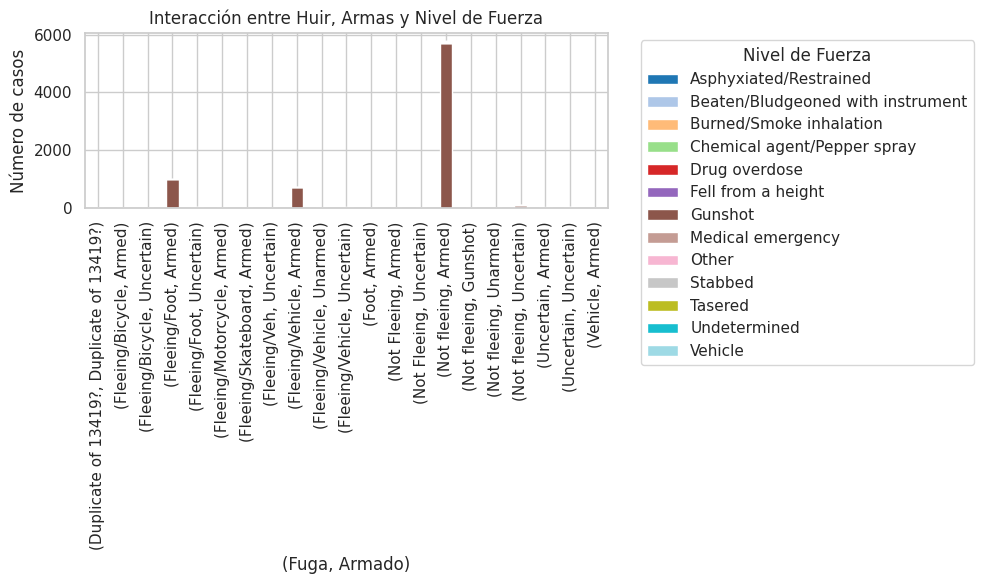

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Asegúrate de que df_limpio_2013 esté cargado y limpio como en tu código.

tabla = pd.crosstab(
    [df_limpio_2013['Fleeing/Not fleeing'], df_limpio_2013['Armed/Unarmed']],
    df_limpio_2013['Highest level of force']
)

ax = tabla.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='tab20')

plt.title('Interacción entre Huir, Armas y Nivel de Fuerza')
plt.ylabel('Número de casos')
plt.xlabel('(Fuga, Armado)')

# Mover la leyenda fuera del gráfico
plt.legend(title='Nivel de Fuerza', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout(rect=[0, 0, 0.85, 1]) # Ajusta el diseño para dar espacio a la leyenda

plt.show()

Este gráfico nos muestra la relación que tiene la variable "Fleeing" (Escapar) con el uso de armas. Y con esto podemos evidenciar que casi todas las personas que escaparon, estaban armadas.

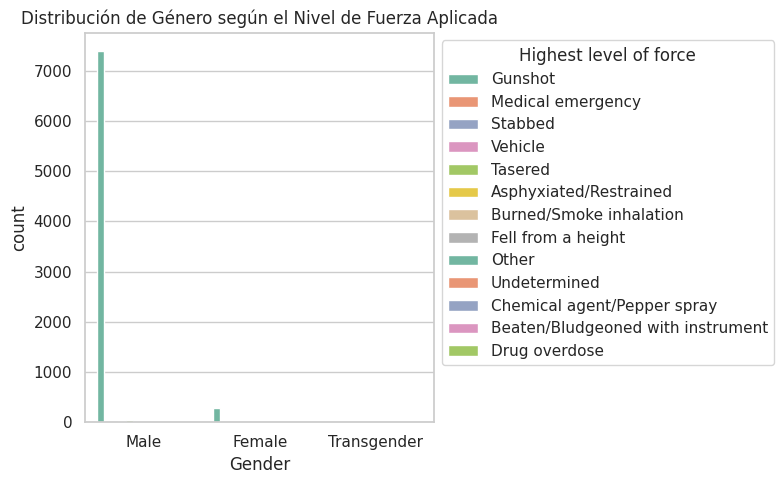

In [ ]:
plt.figure(figsize=(8, 5))
ax = sns.countplot(data=df_limpio_2013, x='Gender', hue='Highest level of force', palette='Set2')
plt.title('Distribución de Género según el Nivel de Fuerza Aplicada')

# Mover la leyenda fuera del gráfico
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

plt.tight_layout()
plt.show()

Este gráfico representa que la mayoría de casos se presentan principalmente con los hombres, pues la cantidad de mujeres es mínima frente al total. Pero tambien se puede evidenciar que la mayoría de casos en los que se presenta un nivel alto de fuerza aplicada por la policia, hacen uso de armas de fuego


<ipython-input-59-c6b862dde9f0>:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




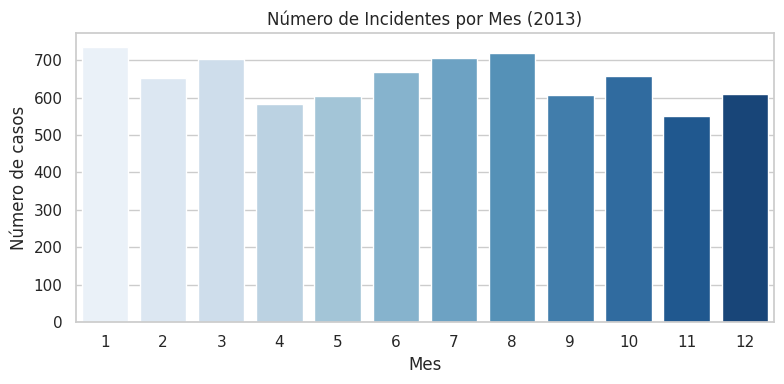

In [ ]:
df_limpio_2013['fecha'] = pd.to_datetime(df_limpio_2013['Date_of_death'], errors='coerce')
df_limpio_2013['mes'] = df_limpio_2013['fecha'].dt.month

plt.figure(figsize=(8, 4))
sns.countplot(data=df_limpio_2013, x='mes', palette='Blues')
plt.title('Número de Incidentes por Mes (2013)')
plt.xlabel('Mes')
plt.ylabel('Número de casos')
plt.tight_layout()
plt.show()

El año 2013 es el año en el que podemos tener mas información, es por eso que lo utilizamos para mirar la cantidad de ataques o incidentes que se presentaban en cada mes. Con este gráfico podemos ver que estos incidentes son muy continuos, no existe alguna estacionaldiad que indique que en algunos meses se pueda presentar una mayor cantidad, sino que estos se presentan de manera recurrente durante todo el año.

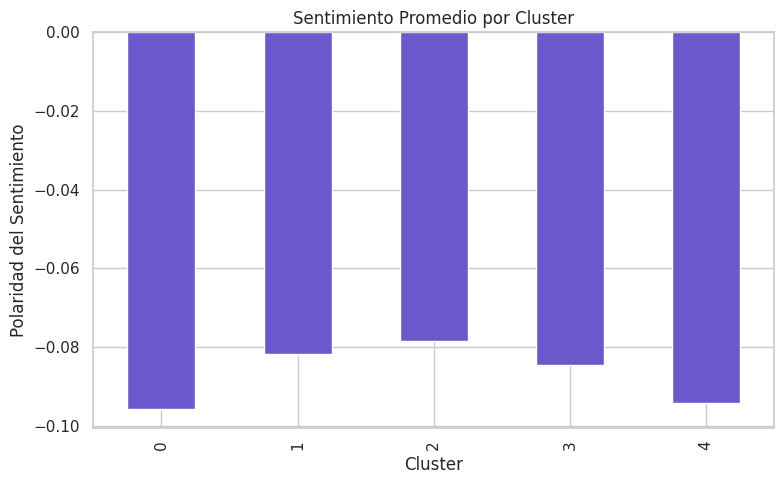

In [ ]:
sent_cluster = df_limpio_2013.groupby('Cluster')['sentiment_polarity'].mean()

sent_cluster.plot(kind='bar', color='slateblue', figsize=(8, 5))
plt.title('Sentimiento Promedio por Cluster')
plt.ylabel('Polaridad del Sentimiento')
plt.xlabel('Cluster')
plt.tight_layout()
plt.show()

Este análisis lo hacemos en base a los comentarios que describen los ataques. Podemos ver que casi todos los comentarios son negativos, es decir que tantos las victimas, como la descripción del caso representan un sentimiento negativo y malo frente a la situación.

In [ ]:
from collections import Counter
import re

for cluster in sorted(df_limpio_2013['Cluster'].unique()):
    textos = df_limpio_2013[df_limpio_2013['Cluster'] == cluster]['cleaned_description'].dropna().str.lower()
    all_words = ' '.join(textos).split()
    words = [w for w in all_words if len(w) > 3 and not w.startswith('http')]
    top_words = Counter(words).most_common(10)

    print(f"\nCluster {cluster} - Palabras más frecuentes:")
    for word, freq in top_words:
        print(f"{word}: {freq}")


Cluster 0 - Palabras más frecuentes:
officer: 2904
police: 2724
shot: 2381
killed: 1561
deputy: 832
said: 791
home: 720
allegedly: 645
responded: 508
fired: 461

Cluster 1 - Palabras más frecuentes:
officer: 1641
police: 1394
shot: 1129
killed: 700
deputy: 406
said: 382
fled: 360
foot: 321
vehicle: 321
allegedly: 318

Cluster 2 - Palabras más frecuentes:
police: 1089
shot: 788
officer: 777
vehicle: 536
killed: 532
deputy: 348
chase: 303
said: 247
allegedly: 246
stop: 221

Cluster 3 - Palabras más frecuentes:
officer: 3411
police: 3261
shot: 2814
killed: 1865
deputy: 1609
home: 1054
said: 941
allegedly: 746
responded: 641
knife: 594

Cluster 4 - Palabras más frecuentes:
officer: 1294
police: 1008
shot: 907
killed: 594
deputy: 333
said: 306
allegedly: 271
knife: 263
home: 224
responded: 209


Este conteo de palabras nos indica cuáles son las palabras más frecuentes por cada cluster

In [ ]:
fig = px.scatter(df_limpio_2013[df_limpio_2013['Highest level of force'] == 'Gunshot'],
                 x='Age',
                 y='Race',
                 color='Cluster',
                 size_max=60,
                 hover_data=['Gender', 'City', 'State', 'Date_of_death'],
                 title="Relación entre Edad, Raza y Clúster en Casos con Arma de Fuego")

fig.update_layout(template="plotly_white")
fig.show()

Este gráfico, "Relación entre Edad, Raza y Clúster en Casos con Arma de Fuego", muestra que la mayoría de los casos de armas de fuego ocurren entre los 20 y 60 años en todas las razas. Sin embargo, hay una clara discriminación por clúster según la raza: los clústeres más bajos (0-2, morado/azul) predominan en personas afroamericanas, sin especificar raza, nativos americanos, asiáticos y de Oriente Medio. Los clústeres más altos (2-4, naranja/amarillo) se asocian mayormente con individuos europeo-americanos/blancos, mientras que los hispanos/latinos se distribuyen en los clústeres intermedios. En resumen, la raza parece ser un factor más determinante en la asignación a un clúster que la edad en estos casos de armas de fuego.

In [ ]:
fig = px.pie(df_limpio_2013[df_limpio_2013['Highest level of force'] == 'Gunshot'],
             names='Cluster',
             title='Distribución de Clústeres en Casos de Disparos',
             hole=0.4)

fig.update_traces(textinfo='percent+label')
fig.show()

Este gráfico de torta nos representa por medio de los porcentajes, la cantidad de casos en los cuales hay presencia de armas de fuego y por ende hay disparos. Nos muestra las cantidades en cuanto al porcentaje que tienen para cada cluster.

#Informe Final
###Introducción

Este estudio tuvo como objetivo analizar los patrones de uso de la fuerza letal por parte de cuerpos policiales en Estados Unidos, basándose en registros de muertes ocurridas entre el 2013 y años posteriores. Se utilizó una base de datos detallada con información sobre las víctimas, incluyendo edad, raza, género, estado, nivel de fuerza utilizada, estado de huida, si portaban armas, y descripciones breves del suceso.

A partir de un riguroso proceso de limpieza y transformación de los datos, se aplicaron técnicas de agrupamiento (clustering) y análisis de sentimientos para descubrir patrones ocultos que puedan sugerir sesgos raciales, geográficos o de comportamiento en el uso de la fuerza policial.


###Metodología

El enfoque general del trabajo se dividió en las siguientes etapas:

- Filtrado y limpieza de datos: Se depuró la base original eliminando valores nulos o inconsistentes, especialmente en variables clave como la edad, el estado o el tipo de arma utilizada.
- Transformación de variables: Se creó una columna para sentimientos a partir de descripciones breves del evento, y se estandarizaron variables como género, raza, y tipo de fuerza.
- Clusterización (K-Means): Se agruparon los datos en 5 clústeres utilizando características como edad, raza, género, y nivel de fuerza. Se empleó el método del codo para determinar el número óptimo de clústeres.
- Análisis de sentimiento y lenguaje: Se analizaron los textos descriptivos con NLP para entender el tono emocional y extraer palabras más frecuentes por clúster.



###Resultados y Hallazgos Principales

- El análisis se enfocó principalmente en el estado de California (CA), donde se ubicaban casitodos los registros post-filtrado.
- Todos los fallecidos eran hombres y la fuerza letal utilizada en el 100% de los casos fue “Gunshot” (arma de fuego).
- Las edades de las víctimas oscilaban principalmente entre 20 y 60 años.

- Clúster 0:
Este grupo está compuesto mayoritariamente por personas afroamericanas o negras, con una edad promedio de aproximadamente 38.7 años. En todos los casos, las víctimas eran hombres y la causa de muerte fue por arma de fuego. El análisis de sentimientos aplicado a las descripciones breves de los eventos muestra un tono predominantemente negativo, con un valor promedio de -0.0956. Las palabras más frecuentes en este clúster incluyen officer, police, shot, killed, home y responded, lo que sugiere que muchas de estas muertes ocurrieron en contextos domiciliarios o durante respuestas policiales.


- Clúster 1:
También conformado principalmente por personas afroamericanas o negras, este clúster tiene una edad promedio más baja, cercana a los 31.2 años. Al igual que en los otros grupos, todas las víctimas eran hombres y murieron por disparos. El sentimiento promedio es negativo (-0.0818), aunque ligeramente menos que en el clúster anterior. Las palabras clave más frecuentes incluyen fled, foot, vehicle, allegedly y officer, lo cual indica que muchas muertes ocurrieron durante intentos de huida, ya sea a pie o en vehículos, y que existían acusaciones o sospechas previas.

- Clúster 2:
Este grupo está compuesto mayoritariamente por personas de raza blanca o europeo-americana, con una edad promedio de 34.8 años. Nuevamente, todas las víctimas son hombres y murieron por disparos. El análisis de sentimientos muestra un valor promedio de -0.0784, el más bajo (menos negativo) entre todos los clústeres. Las palabras más comunes en las descripciones incluyen vehicle, chase, stop, police y shot, lo cual sugiere que estos eventos están relacionados en su mayoría con persecuciones vehiculares o intervenciones durante el tránsito.

- Clúster 3:
Este clúster también está conformado por personas blanco/europeo-americanas, pero con una edad promedio más alta, de alrededor de 41.6 años. Las muertes, todas por arma de fuego, involucran exclusivamente a hombres. El sentimiento promedio es de -0.0845. En cuanto al lenguaje utilizado en las descripciones, se destacan palabras como home, knife, responded, allegedly y killed, lo que indica que estos eventos estuvieron relacionados frecuentemente con situaciones domésticas o respuestas policiales ante individuos armados con objetos cortopunzantes.

- Clúster 4:
Finalmente, este grupo está compuesto en su mayoría por personas hispanas o latinas, con una edad promedio de aproximadamente 35 años. Al igual que los demás clústeres, todas las muertes fueron por arma de fuego y las víctimas eran hombres. El análisis de sentimientos refleja un tono negativo con un valor de -0.0942. Las palabras más frecuentes en las descripciones son knife, home, responded, officer y killed, lo que sugiere un patrón similar al del clúster 3, con eventos que ocurren en domicilios y donde las víctimas, en algunos casos, portaban armas blancas.


###Análisis Crítico

Los resultados muestran patrones preocupantes en la forma como la policía ejerce la fuerza letal:

- La raza de la víctima es una variable claramente diferenciadora en la configuración de clústeres, lo cual indica una posible discriminación sistemática en el uso de la fuerza, especialmente contra personas afroamericanas y latinas.
- La edad parece tener un papel menos determinante, aunque la mayoría de los casos se concentran en adultos jóvenes.
- El lenguaje utilizado en los informes confirma la alta frecuencia de muertes en contextos de persecuciones, respuestas en hogares, y situaciones con armas blancas.
- Todos los clústeres se caracterizan por un sentimiento predominantemente negativo, lo que refuerza el tono trágico y posiblemente injustificado de los eventos.


###Conclusiones

Este estudio confirma patrones preocupantes en el uso de la fuerza letal por parte de la policía, particularmente en el estado de California. A través del análisis de datos, se identificaron grupos poblacionales desproporcionadamente afectados, donde la raza emerge como un factor de riesgo importante.

El uso de herramientas como el análisis de sentimientos y la clusterización ha permitido ver más allá de estadísticas superficiales, revelando tendencias estructurales y lingüísticas que sugieren sesgos implícitos o explícitos en las acciones policiales.


###Recomendaciones

- Transparencia institucional: Las fuerzas policiales deben publicar informes detallados que incluyan descripciones completas y verificables de cada incidente.
- Capacitación en derechos humanos: Mayor formación en manejo de conflictos y no discriminación para los oficiales.
- Estudios continuos: Repetir este tipo de análisis de forma anual para monitorear avances o retrocesos.
- Auditorías externas: Permitir que entidades independientes analicen y supervisen el uso de la fuerza en situaciones policiales.
